In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import re

# Rim puro AD results, comparing UMI counts

In [2]:
trebl_exp_results_path = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/rim/no_err_corr/AD_trebl_experiment_results.csv"
trebl_exp_results = pd.read_csv(trebl_exp_results_path)
trebl_exp_results

,AD_ADBC_concat,AD_umi_count_complex,name,ADBC2,HawkBCs,AD_umi_count_simple
0,TTTGGGCCATTAACG,8302,a35_ADBC_Rim_Puro_R3_T24_S189,TTTGGG,CCATTAACG,8695
1,TGATGTAACAGCCGA,6783,a35_ADBC_Rim_Puro_R3_T24_S189,TGATGT,AACAGCCGA,7096
2,GATAAGCATTCCAAG,31451,a35_ADBC_Rim_Puro_R3_T24_S189,GATAAG,CATTCCAAG,34288
3,ACAAGCCCACCTTAC,5177,a35_ADBC_Rim_Puro_R3_T24_S189,ACAAGC,CCACCTTAC,5447
4,AGGACGCAGTTACAC,566,a35_ADBC_Rim_Puro_R3_T24_S189,AGGACG,CAGTTACAC,583
...,...,...,...,...,...,...
418157,TGATGTAACAGCCGG,1,a28_ADBC_Rim_Puro_R4_T4_S170,TGATGT,AACAGCCGG,1
418158,TCAGAAAGGTTCGAC,1,a28_ADBC_Rim_Puro_R4_T4_S170,TCAGAA,AGGTTCGAC,1
418159,AGATTGAGTATAACC,1,a28_ADBC_Rim_Puro_R4_T4_S170,AGATTG,AGTATAACC,1
418160,GCCCAACACGCCAAT,1,a28_ADBC_Rim_Puro_R4_T4_S170,GCCCAA,CACGCCAAT,1


In [3]:
trebl_exp_results["umis_removed"] = trebl_exp_results["AD_umi_count_simple"] - trebl_exp_results["AD_umi_count_complex"]
trebl_exp_results["percent_umis_removed"] = trebl_exp_results["umis_removed"] / trebl_exp_results["AD_umi_count_simple"]
trebl_exp_results

,AD_ADBC_concat,AD_umi_count_complex,name,ADBC2,HawkBCs,AD_umi_count_simple,umis_removed,percent_umis_removed
0,TTTGGGCCATTAACG,8302,a35_ADBC_Rim_Puro_R3_T24_S189,TTTGGG,CCATTAACG,8695,393,0.045198
1,TGATGTAACAGCCGA,6783,a35_ADBC_Rim_Puro_R3_T24_S189,TGATGT,AACAGCCGA,7096,313,0.044109
2,GATAAGCATTCCAAG,31451,a35_ADBC_Rim_Puro_R3_T24_S189,GATAAG,CATTCCAAG,34288,2837,0.082740
3,ACAAGCCCACCTTAC,5177,a35_ADBC_Rim_Puro_R3_T24_S189,ACAAGC,CCACCTTAC,5447,270,0.049569
4,AGGACGCAGTTACAC,566,a35_ADBC_Rim_Puro_R3_T24_S189,AGGACG,CAGTTACAC,583,17,0.029160
...,...,...,...,...,...,...,...,...
418157,TGATGTAACAGCCGG,1,a28_ADBC_Rim_Puro_R4_T4_S170,TGATGT,AACAGCCGG,1,0,0.000000
418158,TCAGAAAGGTTCGAC,1,a28_ADBC_Rim_Puro_R4_T4_S170,TCAGAA,AGGTTCGAC,1,0,0.000000
418159,AGATTGAGTATAACC,1,a28_ADBC_Rim_Puro_R4_T4_S170,AGATTG,AGTATAACC,1,0,0.000000
418160,GCCCAACACGCCAAT,1,a28_ADBC_Rim_Puro_R4_T4_S170,GCCCAA,CACGCCAAT,1,0,0.000000


In [4]:
# Yay! complex count is always lower than simple
trebl_exp_results[trebl_exp_results["AD_umi_count_complex"] > trebl_exp_results["AD_umi_count_simple"]]

,AD_ADBC_concat,AD_umi_count_complex,name,ADBC2,HawkBCs,AD_umi_count_simple,umis_removed,percent_umis_removed


<Axes: xlabel='AD_umi_count_simple', ylabel='AD_umi_count_complex'>

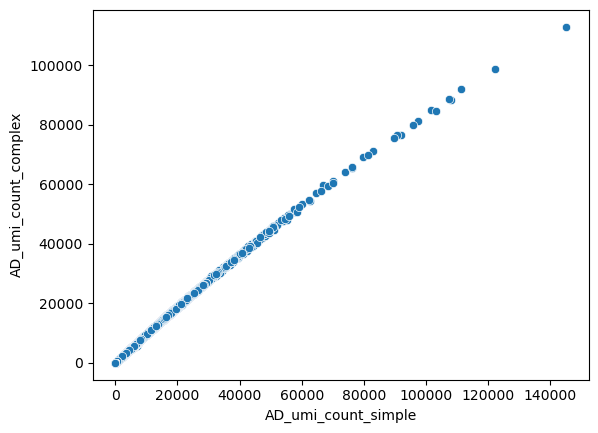

In [5]:
sns.scatterplot(data = trebl_exp_results, x = "AD_umi_count_simple", y = "AD_umi_count_complex")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


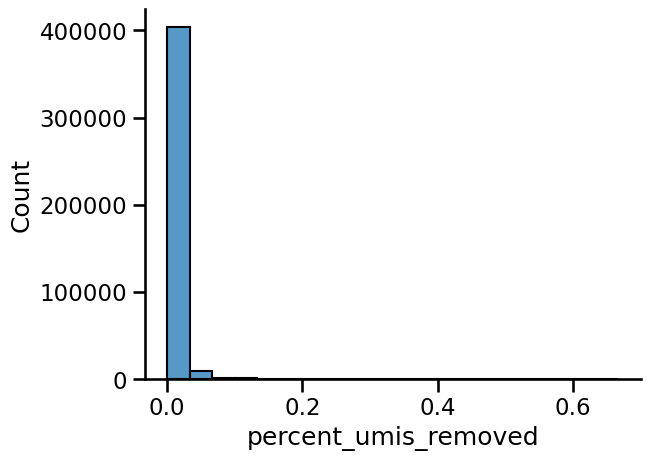

In [13]:
sns.set_context('talk')
sns.histplot(trebl_exp_results["percent_umis_removed"], log_scale = (False, False))
sns.despine()

# Rim: Reads per AD UMI

In [15]:
import glob

In [16]:
reads_per_umi_paths = glob.glob("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/*ADBC*/*_reads_per_umi.tsv")
reads_per_umi_paths

['/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_a3_ADBC_Rim_Puro_R3_T0ND_S181/a3_ADBC_Rim_Puro_R3_T0ND_S181_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_a31_ADBC_Rim_Puro_R3_T6_S185/a31_ADBC_Rim_Puro_R3_T6_S185_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_a38_ADBC_Rim_Puro_R2_T48_S192/a38_ADBC_Rim_Puro_R2_T48_S192_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_a36_ADBC_Rim_Puro_R4_T24_S190/a36_ADBC_Rim_Puro_R4_T24_S190_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_a1_ADBC_Rim_Puro_R1_T0ND_S179/a1_ADBC_Rim_Puro_R1_T0ND_S179_reads_per_umi.tsv',
 '/glob

In [17]:
reads_per_umi_paths_df = pd.DataFrame(reads_per_umi_paths)
reads_per_umi_paths_df["group"] = reads_per_umi_paths_df[0].str.extract(r'\/([^\/]+)_reads_per_umi\.tsv')
reads_per_umi_paths_df["rep"] = reads_per_umi_paths_df["group"].str.extract("_R(\d+)_").astype(int)
reads_per_umi_paths_df["time"] = reads_per_umi_paths_df["group"].str.extract("_T(.*)_S").replace("0ND", "-1").astype(int)
reads_per_umi_paths_df

,0,group,rep,time
0,/global/scratch/projects/fc_mvslab/OpenProject...,a3_ADBC_Rim_Puro_R3_T0ND_S181,3,-1
1,/global/scratch/projects/fc_mvslab/OpenProject...,a31_ADBC_Rim_Puro_R3_T6_S185,3,6
2,/global/scratch/projects/fc_mvslab/OpenProject...,a38_ADBC_Rim_Puro_R2_T48_S192,2,48
3,/global/scratch/projects/fc_mvslab/OpenProject...,a36_ADBC_Rim_Puro_R4_T24_S190,4,24
4,/global/scratch/projects/fc_mvslab/OpenProject...,a1_ADBC_Rim_Puro_R1_T0ND_S179,1,-1
5,/global/scratch/projects/fc_mvslab/OpenProject...,a30_ADBC_Rim_Puro_R2_T6_S184,2,6
6,/global/scratch/projects/fc_mvslab/OpenProject...,a2_ADBC_Rim_Puro_R2_T0ND_S180,2,-1
7,/global/scratch/projects/fc_mvslab/OpenProject...,a4_ADBC_Rim_Puro_R4_T0ND_S182,4,-1
8,/global/scratch/projects/fc_mvslab/OpenProject...,a29_ADBC_Rim_Puro_R1_T6_S183,1,6
9,/global/scratch/projects/fc_mvslab/OpenProject...,a27_ADBC_Rim_Puro_R3_T4_S169,3,4


In [18]:
reads_per_umi_paths_df_one_rep = reads_per_umi_paths_df[reads_per_umi_paths_df["rep"] == 1]
reads_per_umi_paths_df_one_rep = reads_per_umi_paths_df_one_rep.sort_values(by = 'time')
reads_per_umi_paths_df_one_rep["time"] = reads_per_umi_paths_df_one_rep["time"].replace(-1, "0ND")
reads_per_umi_paths_df_one_rep

,0,group,rep,time
4,/global/scratch/projects/fc_mvslab/OpenProject...,a1_ADBC_Rim_Puro_R1_T0ND_S179,1,0ND
11,/global/scratch/projects/fc_mvslab/OpenProject...,a21_ADBC_Rim_Puro_R1_T0_S163,1,0
18,/global/scratch/projects/fc_mvslab/OpenProject...,a25_ADBC_Rim_Puro_R1_T4_S167,1,4
8,/global/scratch/projects/fc_mvslab/OpenProject...,a29_ADBC_Rim_Puro_R1_T6_S183,1,6
20,/global/scratch/projects/fc_mvslab/OpenProject...,a33_ADBC_Rim_Puro_R1_T24_S187,1,24
14,/global/scratch/projects/fc_mvslab/OpenProject...,a37_ADBC_Rim_Puro_R1_T48_S191,1,48


In [20]:
# Read once to avoid spending time later doing this
reads_cache = {}
for path in tqdm(reads_per_umi_paths_df[0].unique()):
    reads_cache[path] = pd.read_csv(path, sep="\t")

100%|██████████| 24/24 [01:08<00:00,  2.86s/it]


In [51]:
avg_reads = []

for path in tqdm(reads_per_umi_paths_df[0]):
    df = reads_cache[path]
    avg_reads.append( df["reads"].mean())

reads_per_umi_paths_df["avg_reads_per_umi"] = avg_reads
reads_per_umi_paths_df

100%|██████████| 24/24 [00:00<00:00, 244.46it/s]


,0,group,rep,time,avg_reads_per_umi
0,/global/scratch/projects/fc_mvslab/OpenProject...,a3_ADBC_Rim_Puro_R3_T0ND_S181,3,-1,12.560860
1,/global/scratch/projects/fc_mvslab/OpenProject...,a31_ADBC_Rim_Puro_R3_T6_S185,3,6,1.387636
2,/global/scratch/projects/fc_mvslab/OpenProject...,a38_ADBC_Rim_Puro_R2_T48_S192,2,48,1.649361
3,/global/scratch/projects/fc_mvslab/OpenProject...,a36_ADBC_Rim_Puro_R4_T24_S190,4,24,4.438312
4,/global/scratch/projects/fc_mvslab/OpenProject...,a1_ADBC_Rim_Puro_R1_T0ND_S179,1,-1,15.698134
5,/global/scratch/projects/fc_mvslab/OpenProject...,a30_ADBC_Rim_Puro_R2_T6_S184,2,6,3.256452
6,/global/scratch/projects/fc_mvslab/OpenProject...,a2_ADBC_Rim_Puro_R2_T0ND_S180,2,-1,14.003191
7,/global/scratch/projects/fc_mvslab/OpenProject...,a4_ADBC_Rim_Puro_R4_T0ND_S182,4,-1,14.041801
8,/global/scratch/projects/fc_mvslab/OpenProject...,a29_ADBC_Rim_Puro_R1_T6_S183,1,6,2.536164
9,/global/scratch/projects/fc_mvslab/OpenProject...,a27_ADBC_Rim_Puro_R3_T4_S169,3,4,2.916011


100%|██████████| 4/4 [00:34<00:00,  8.68s/it]


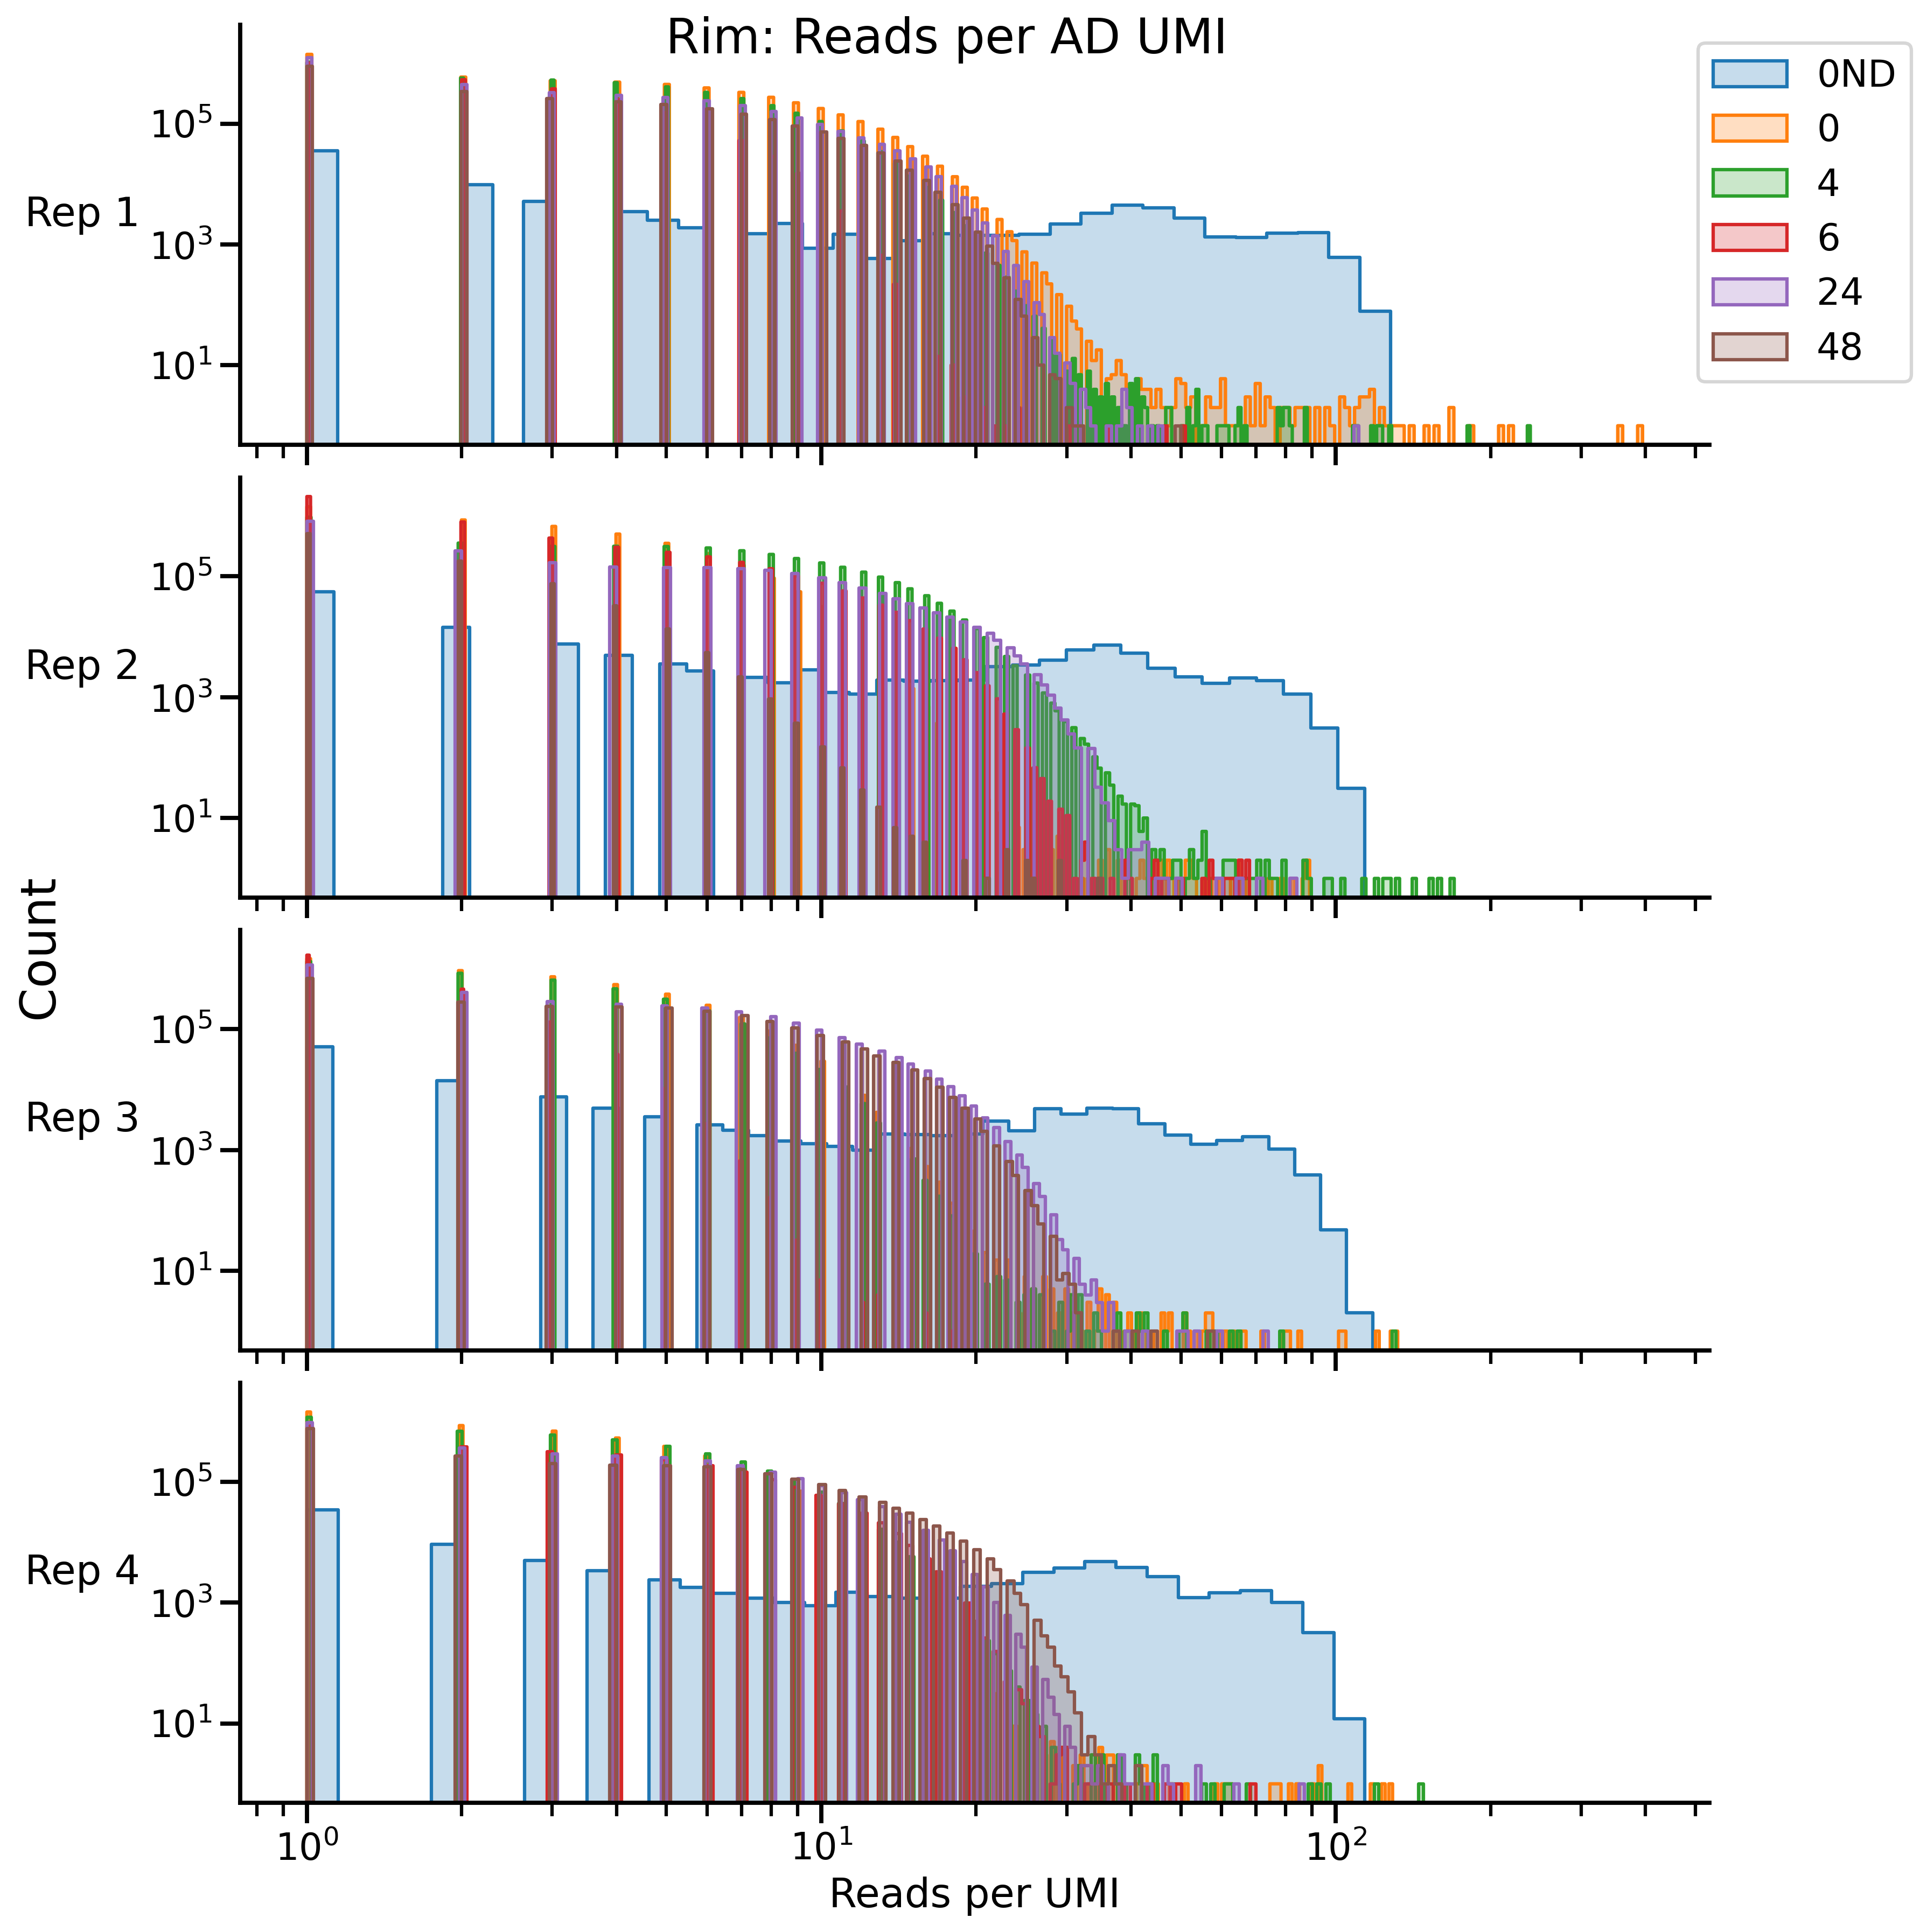

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), dpi=300, sharex=True, sharey=True)

times = ["0ND", "0", "4", "6", "24", "48"]

palette = sns.color_palette("tab10", n_colors=len(times))
TIME_PALETTE = dict(zip(times, palette))

for ax, rep in tqdm(list(zip(axes, range(1, 5))), total=4):
    df_rep = reads_per_umi_paths_df[reads_per_umi_paths_df["rep"] == rep].sort_values("time")
    df_rep["time"] = df_rep["time"].replace(-1, "0ND")

    for path in df_rep[0]:
        reads_df = reads_cache[path]
        name = re.search(r'/([^/]+)_reads_per_umi\.tsv', path).group(1)
        name = re.search("_T(.*)_S", name).group(1)

        sns.histplot(
            reads_df["reads"],
            log_scale=(True, True),
            element="step",
            alpha=0.25,
            label=name,
            color=TIME_PALETTE[name],
            ax=ax
        )

    # ax.set_title(f"Rep {rep}")
    ax.set_ylabel(f"Rep {rep}", rotation = 0, x = -100, ha = 'right')
    sns.despine(ax=ax)

axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
axes[-1].set_xlabel("Reads per UMI")

fig.supylabel("Count")
plt.suptitle("Rim: Reads per AD UMI")
plt.tight_layout(pad = 0)
plt.savefig("../../output/NKX2-2/SK_pipeline/no_err_corr/rim_reads_per_ad_umi.png", bbox_inches="tight")

# Rim: Reads per RT UMI

In [25]:
reads_per_RT_umi_paths = glob.glob("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/*RTBC*/*_reads_per_umi.tsv")
reads_per_RT_umi_paths

['/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_r22_RTBC_Rim_Puro_R2_T0_S172/r22_RTBC_Rim_Puro_R2_T0_S172_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_r37_RTBC_Rim_Puro_R1_T48_S199/r37_RTBC_Rim_Puro_R1_T48_S199_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_r38_RTBC_Rim_Puro_R2_T48_S200/r38_RTBC_Rim_Puro_R2_T48_S200_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_r31_RTBC_Rim_Puro_R3_T6_S209/r31_RTBC_Rim_Puro_R3_T6_S209_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/SK_pipeline/no_err_corr/trebl_experiment_r35_RTBC_Rim_Puro_R3_T24_S197/r35_RTBC_Rim_Puro_R3_T24_S197_reads_per_umi.tsv',
 '/global

In [26]:
reads_per_RT_umi_paths_df = pd.DataFrame(reads_per_RT_umi_paths)
reads_per_RT_umi_paths_df["group"] = reads_per_RT_umi_paths_df[0].str.extract(r'\/([^\/]+)_reads_per_umi\.tsv')
reads_per_RT_umi_paths_df["rep"] = reads_per_RT_umi_paths_df["group"].str.extract("_R(\d+)_").astype(int)
reads_per_RT_umi_paths_df["time"] = reads_per_RT_umi_paths_df["group"].str.extract("_T(.*)_S").replace("0ND", "-1").astype(int)
reads_per_RT_umi_paths_df

,0,group,rep,time
0,/global/scratch/projects/fc_mvslab/OpenProject...,r22_RTBC_Rim_Puro_R2_T0_S172,2,0
1,/global/scratch/projects/fc_mvslab/OpenProject...,r37_RTBC_Rim_Puro_R1_T48_S199,1,48
2,/global/scratch/projects/fc_mvslab/OpenProject...,r38_RTBC_Rim_Puro_R2_T48_S200,2,48
3,/global/scratch/projects/fc_mvslab/OpenProject...,r31_RTBC_Rim_Puro_R3_T6_S209,3,6
4,/global/scratch/projects/fc_mvslab/OpenProject...,r35_RTBC_Rim_Puro_R3_T24_S197,3,24
5,/global/scratch/projects/fc_mvslab/OpenProject...,r34_RTBC_Rim_Puro_R2_T24_S196,2,24
6,/global/scratch/projects/fc_mvslab/OpenProject...,r21_RTBC_Rim_Puro_R1_T0_S171,1,0
7,/global/scratch/projects/fc_mvslab/OpenProject...,r1_RTBC_Rim_Puro_R1_T0ND_S203,1,-1
8,/global/scratch/projects/fc_mvslab/OpenProject...,r33_RTBC_Rim_Puro_R1_T24_S195,1,24
9,/global/scratch/projects/fc_mvslab/OpenProject...,r30_RTBC_Rim_Puro_R2_T6_S208,2,6


In [27]:
# Read once to avoid spending time later doing this
RT_reads_cache = {}
for path in tqdm(reads_per_RT_umi_paths_df[0].unique()):
    RT_reads_cache[path] = pd.read_csv(path, sep="\t")

100%|██████████| 24/24 [00:53<00:00,  2.21s/it]


In [50]:
avg_reads = []

for path in tqdm(reads_per_RT_umi_paths_df[0]):
    df = RT_reads_cache[path]
    avg_reads.append( df["reads"].mean())

reads_per_RT_umi_paths_df["avg_reads_per_umi"] = avg_reads
reads_per_RT_umi_paths_df

100%|██████████| 24/24 [00:00<00:00, 298.86it/s]


,0,group,rep,time,avg_reads_per_umi
0,/global/scratch/projects/fc_mvslab/OpenProject...,r22_RTBC_Rim_Puro_R2_T0_S172,2,0,6.115505
1,/global/scratch/projects/fc_mvslab/OpenProject...,r37_RTBC_Rim_Puro_R1_T48_S199,1,48,5.034880
2,/global/scratch/projects/fc_mvslab/OpenProject...,r38_RTBC_Rim_Puro_R2_T48_S200,2,48,5.788049
3,/global/scratch/projects/fc_mvslab/OpenProject...,r31_RTBC_Rim_Puro_R3_T6_S209,3,6,3.395508
4,/global/scratch/projects/fc_mvslab/OpenProject...,r35_RTBC_Rim_Puro_R3_T24_S197,3,24,3.586948
5,/global/scratch/projects/fc_mvslab/OpenProject...,r34_RTBC_Rim_Puro_R2_T24_S196,2,24,5.462036
6,/global/scratch/projects/fc_mvslab/OpenProject...,r21_RTBC_Rim_Puro_R1_T0_S171,1,0,5.463885
7,/global/scratch/projects/fc_mvslab/OpenProject...,r1_RTBC_Rim_Puro_R1_T0ND_S203,1,-1,10.807375
8,/global/scratch/projects/fc_mvslab/OpenProject...,r33_RTBC_Rim_Puro_R1_T24_S195,1,24,4.066981
9,/global/scratch/projects/fc_mvslab/OpenProject...,r30_RTBC_Rim_Puro_R2_T6_S208,2,6,4.113260


100%|██████████| 4/4 [00:28<00:00,  7.17s/it]


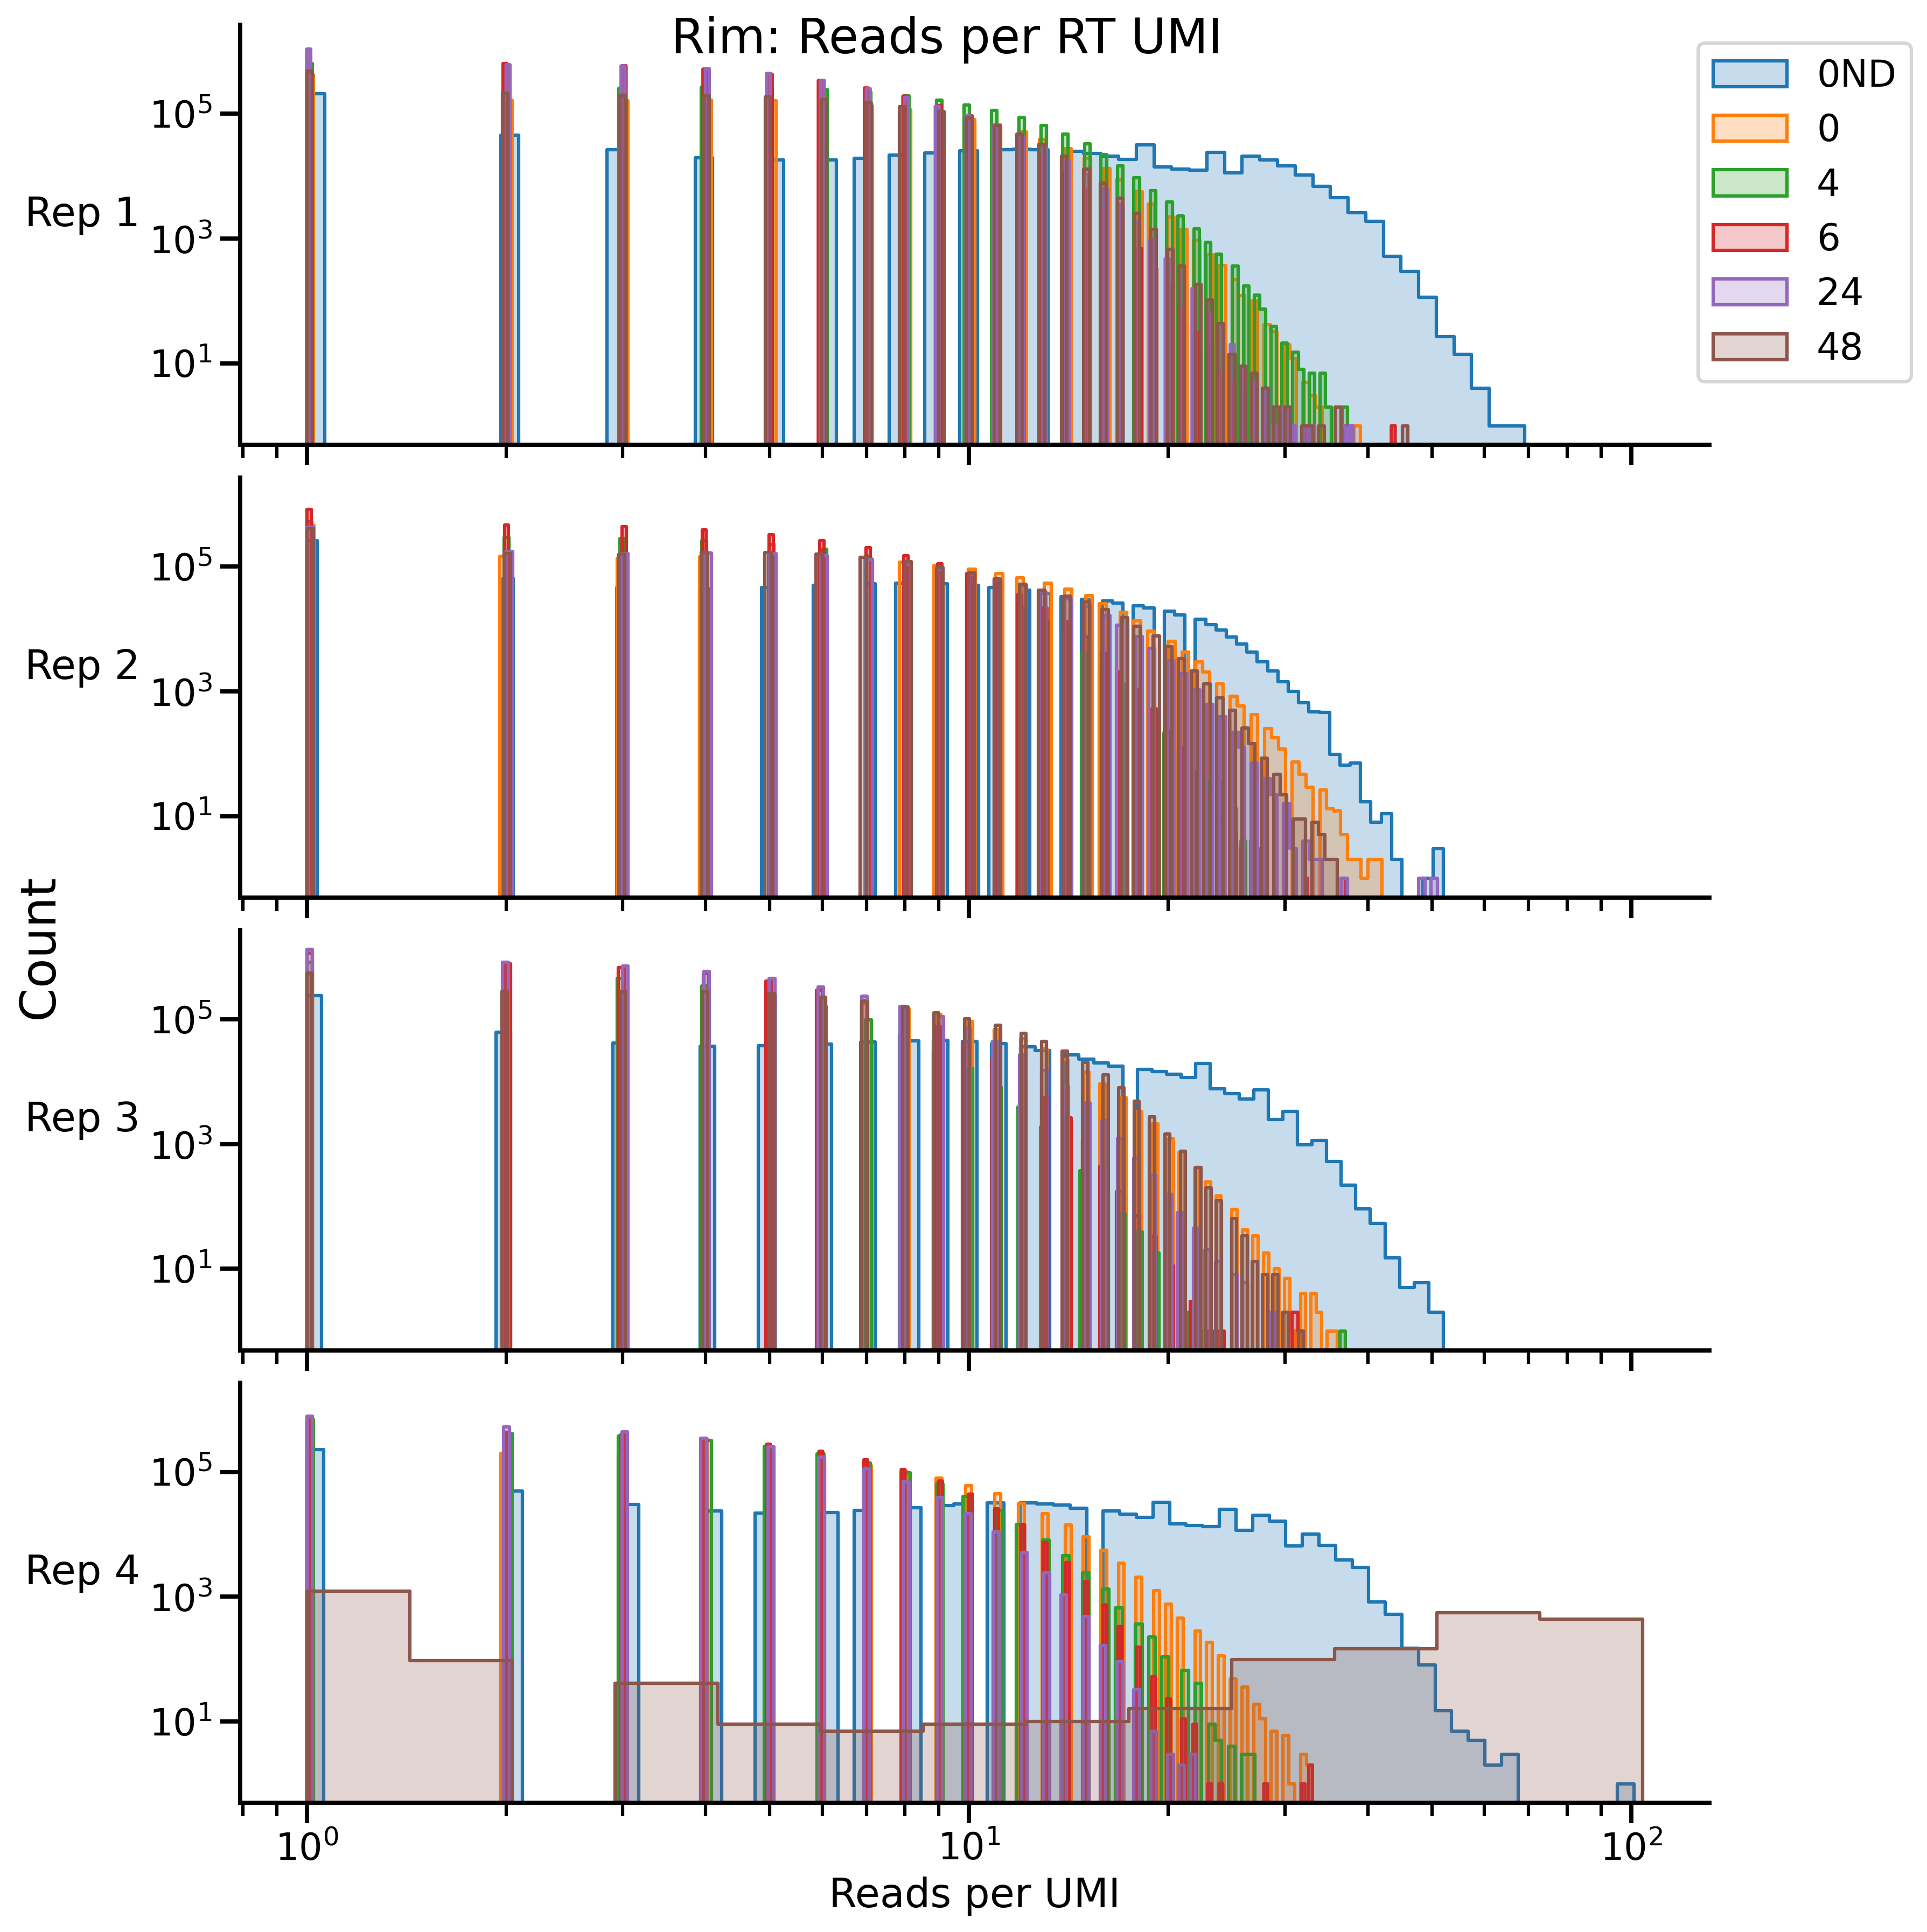

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), dpi=300, sharex=True, sharey=True)

for ax, rep in tqdm(list(zip(axes, range(1, 5))), total=4):
    df_rep = reads_per_RT_umi_paths_df[reads_per_RT_umi_paths_df["rep"] == rep].sort_values("time")
    df_rep["time"] = df_rep["time"].replace(-1, "0ND")

    for path in df_rep[0]:
        reads_df = RT_reads_cache[path]
        name = re.search(r'/([^/]+)_reads_per_umi\.tsv', path).group(1)
        name = re.search("_T(.*)_S", name).group(1)

        sns.histplot(
            reads_df["reads"],
            log_scale=(True, True),
            element="step",
            alpha=0.25,
            label=name,
            ax=ax,
            color=TIME_PALETTE[name],

        )

    # ax.set_title(f"Rep {rep}")
    ax.set_ylabel(f"Rep {rep}", rotation = 0, x = -100, ha = 'right')
    sns.despine(ax=ax)

axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
axes[-1].set_xlabel("Reads per UMI")

fig.supylabel("Count")
plt.suptitle("Rim: Reads per RT UMI")
plt.tight_layout(pad = 0)
plt.savefig("../../output/NKX2-2/SK_pipeline/no_err_corr/rim_reads_per_rt_umi.png", bbox_inches="tight")

# Puro: Reads per AD UMI

In [30]:
reads_per_puro_AD_umi_paths = glob.glob("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/*ADBC*/*_reads_per_umi.tsv")
reads_per_puro_AD_umi_paths

['/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_a5_ADBC_Puro_Only_R1_T4_S94/a5_ADBC_Puro_Only_R1_T4_S94_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_a9_ADBC_Puro_Only_R1_T24_S98/a9_ADBC_Puro_Only_R1_T24_S98_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_a17_ADBC_Puro_Only_R1_T0_S89/a17_ADBC_Puro_Only_R1_T0_S89_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_a6_ADBC_Puro_Only_R2_T4_S95/a6_ADBC_Puro_Only_R2_T4_S95_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_a10_ADBC_Puro_Only_R2_T24_S99/a10_ADBC_Puro_Only_R2_T24_S99_reads_per_umi.tsv

In [45]:
reads_per_puro_AD_umi_paths_df = pd.DataFrame(reads_per_puro_AD_umi_paths)
reads_per_puro_AD_umi_paths_df["group"] = reads_per_puro_AD_umi_paths_df[0].str.extract(r'\/([^\/]+)_reads_per_umi\.tsv')
reads_per_puro_AD_umi_paths_df["rep"] = reads_per_puro_AD_umi_paths_df["group"].str.extract("_R(\d+)_").astype(int)
reads_per_puro_AD_umi_paths_df["time"] = reads_per_puro_AD_umi_paths_df["group"].str.extract("_T(.*)_S").replace("0ND", "-1").astype(int)
reads_per_puro_AD_umi_paths_df

,0,group,rep,time
0,/global/scratch/projects/fc_mvslab/OpenProject...,a5_ADBC_Puro_Only_R1_T4_S94,1,4
1,/global/scratch/projects/fc_mvslab/OpenProject...,a9_ADBC_Puro_Only_R1_T24_S98,1,24
2,/global/scratch/projects/fc_mvslab/OpenProject...,a17_ADBC_Puro_Only_R1_T0_S89,1,0
3,/global/scratch/projects/fc_mvslab/OpenProject...,a6_ADBC_Puro_Only_R2_T4_S95,2,4
4,/global/scratch/projects/fc_mvslab/OpenProject...,a10_ADBC_Puro_Only_R2_T24_S99,2,24
5,/global/scratch/projects/fc_mvslab/OpenProject...,a13_ADBC_Puro_Only_R1_T48_S86,1,48
6,/global/scratch/projects/fc_mvslab/OpenProject...,a8_ADBC_Puro_Only_R4_T4_S97,4,4
7,/global/scratch/projects/fc_mvslab/OpenProject...,a18_ADBC_Puro_Only_R2_T0_S90,2,0
8,/global/scratch/projects/fc_mvslab/OpenProject...,a14_ADBC_Puro_Only_R2_T48_S87,2,48
9,/global/scratch/projects/fc_mvslab/OpenProject...,a16_ADBC_Puro_Only_R4_T48_S88,4,48


In [43]:
# Read once to avoid spending time later doing this
AD_puro_reads_cache = {}
for path in tqdm(reads_per_puro_AD_umi_paths_df[0].unique()):
    AD_puro_reads_cache[path] = pd.read_csv(path, sep="\t")

100%|██████████| 16/16 [00:27<00:00,  1.72s/it]


In [48]:
avg_reads = []

for path in tqdm(reads_per_puro_AD_umi_paths_df[0]):
    df = AD_puro_reads_cache[path]
    avg_reads.append( df["reads"].mean())

reads_per_puro_AD_umi_paths_df["avg_reads_per_umi"] = avg_reads
reads_per_puro_AD_umi_paths_df

100%|██████████| 16/16 [00:00<00:00, 328.52it/s]


,0,group,rep,time,avg_reads_per_umi
0,/global/scratch/projects/fc_mvslab/OpenProject...,a5_ADBC_Puro_Only_R1_T4_S94,1,4,4.441653
1,/global/scratch/projects/fc_mvslab/OpenProject...,a9_ADBC_Puro_Only_R1_T24_S98,1,24,4.513740
2,/global/scratch/projects/fc_mvslab/OpenProject...,a17_ADBC_Puro_Only_R1_T0_S89,1,0,6.225439
3,/global/scratch/projects/fc_mvslab/OpenProject...,a6_ADBC_Puro_Only_R2_T4_S95,2,4,6.040711
4,/global/scratch/projects/fc_mvslab/OpenProject...,a10_ADBC_Puro_Only_R2_T24_S99,2,24,2.649993
5,/global/scratch/projects/fc_mvslab/OpenProject...,a13_ADBC_Puro_Only_R1_T48_S86,1,48,1.039001
6,/global/scratch/projects/fc_mvslab/OpenProject...,a8_ADBC_Puro_Only_R4_T4_S97,4,4,2.809152
7,/global/scratch/projects/fc_mvslab/OpenProject...,a18_ADBC_Puro_Only_R2_T0_S90,2,0,6.235921
8,/global/scratch/projects/fc_mvslab/OpenProject...,a14_ADBC_Puro_Only_R2_T48_S87,2,48,4.525868
9,/global/scratch/projects/fc_mvslab/OpenProject...,a16_ADBC_Puro_Only_R4_T48_S88,4,48,3.914532


100%|██████████| 4/4 [00:15<00:00,  3.84s/it]


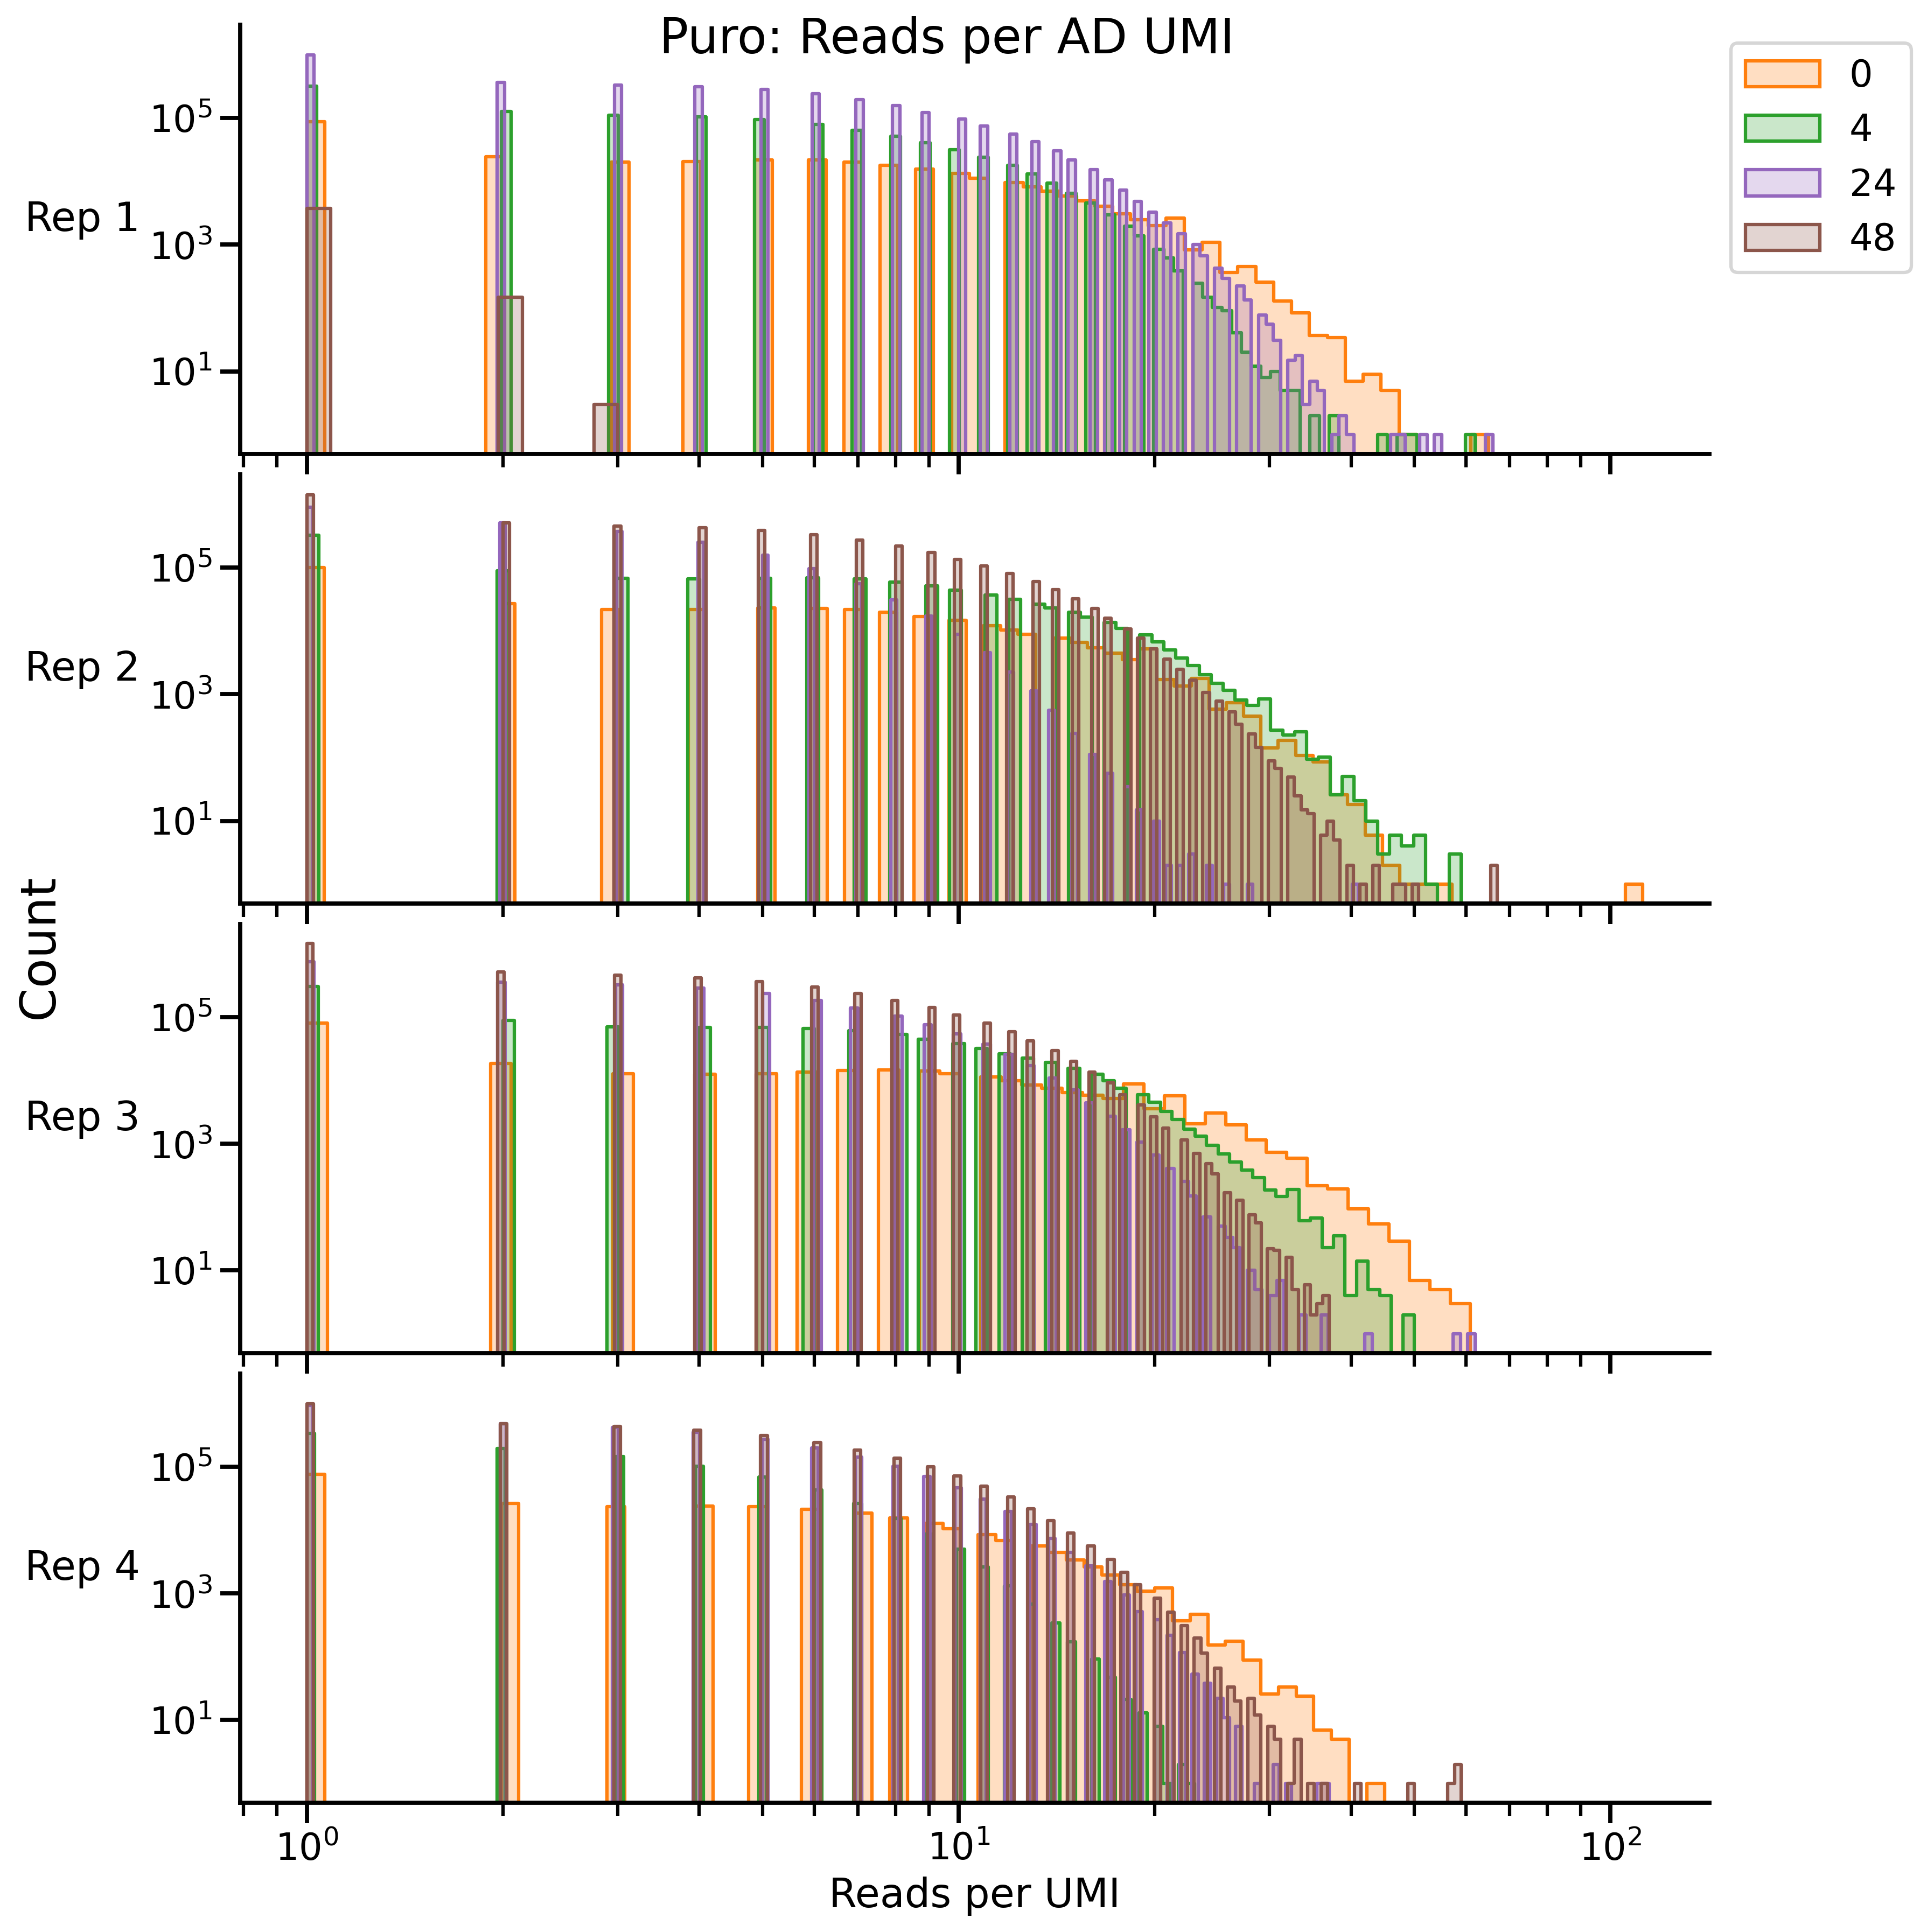

In [34]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), dpi=300, sharex=True, sharey=True)

for ax, rep in tqdm(list(zip(axes, range(1, 5))), total=4):
    df_rep = reads_per_puro_AD_umi_paths_df[reads_per_puro_AD_umi_paths_df["rep"] == rep].sort_values("time")
    df_rep["time"] = df_rep["time"].replace(-1, "0ND")

    for path in df_rep[0]:
        reads_df = AD_puro_reads_cache[path]
        name = re.search(r'/([^/]+)_reads_per_umi\.tsv', path).group(1)
        name = re.search("_T(.*)_S", name).group(1)

        sns.histplot(
            reads_df["reads"],
            log_scale=(True, True),
            element="step",
            alpha=0.25,
            label=name,
            ax=ax,
            color=TIME_PALETTE[name],

        )

    # ax.set_title(f"Rep {rep}")
    ax.set_ylabel(f"Rep {rep}", rotation = 0, x = -100, ha = 'right')
    sns.despine(ax=ax)

axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
axes[-1].set_xlabel("Reads per UMI")

fig.supylabel("Count")
plt.suptitle("Puro: Reads per AD UMI")
plt.tight_layout(pad = 0)
plt.savefig("../../output/NKX2-2/TL4B2/puro_only/no_err_corr/puro_reads_per_ad_umi.png", bbox_inches="tight")

# Puro: Reads per RT UMI

In [35]:
reads_per_puro_RT_umi_paths = glob.glob("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/*RTBC*/*_reads_per_umi.tsv")
reads_per_puro_RT_umi_paths

['/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_r17_RTBC_Puro_Only_R1_T0_S114/r17_RTBC_Puro_Only_R1_T0_S114_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_r19_RTBC_Puro_Only_R3_T0_S116/r19_RTBC_Puro_Only_R3_T0_S116_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_r12_RTBC_Puro_Only_R4_T24_S109/r12_RTBC_Puro_Only_R4_T24_S109_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_r18_RTBC_Puro_Only_R2_T0_S115/r18_RTBC_Puro_Only_R2_T0_S115_reads_per_umi.tsv',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/no_err_corr/trebl_experiment_r9_RTBC_Puro_Only_R1_T24_S106/r9_RTBC_Puro_Only_R1_T24_S106_rea

In [37]:
reads_per_puro_RT_umi_paths_df = pd.DataFrame(reads_per_puro_RT_umi_paths)
reads_per_puro_RT_umi_paths_df["group"] = reads_per_puro_RT_umi_paths_df[0].str.extract(r'\/([^\/]+)_reads_per_umi\.tsv')
reads_per_puro_RT_umi_paths_df["rep"] = reads_per_puro_RT_umi_paths_df["group"].str.extract("_R(\d+)_").astype(int)
reads_per_puro_RT_umi_paths_df["time"] = reads_per_puro_RT_umi_paths_df["group"].str.extract("_T(.*)_S").replace("0ND", "-1").astype(int)
reads_per_puro_RT_umi_paths_df

,0,group,rep,time
0,/global/scratch/projects/fc_mvslab/OpenProject...,r17_RTBC_Puro_Only_R1_T0_S114,1,0
1,/global/scratch/projects/fc_mvslab/OpenProject...,r19_RTBC_Puro_Only_R3_T0_S116,3,0
2,/global/scratch/projects/fc_mvslab/OpenProject...,r12_RTBC_Puro_Only_R4_T24_S109,4,24
3,/global/scratch/projects/fc_mvslab/OpenProject...,r18_RTBC_Puro_Only_R2_T0_S115,2,0
4,/global/scratch/projects/fc_mvslab/OpenProject...,r9_RTBC_Puro_Only_R1_T24_S106,1,24
5,/global/scratch/projects/fc_mvslab/OpenProject...,r7_RTBC_Puro_Only_R3_T4_S104,3,4
6,/global/scratch/projects/fc_mvslab/OpenProject...,r15_RTBC_Puro_Only_R3_T48_S112,3,48
7,/global/scratch/projects/fc_mvslab/OpenProject...,r10_RTBC_Puro_Only_R2_T24_S107,2,24
8,/global/scratch/projects/fc_mvslab/OpenProject...,r11_RTBC_Puro_Only_R3_T24_S108,3,24
9,/global/scratch/projects/fc_mvslab/OpenProject...,r13_RTBC_Puro_Only_R1_T48_S110,1,48


In [38]:
# Read once to avoid spending time later doing this
RT_puro_reads_cache = {}
for path in tqdm(reads_per_puro_RT_umi_paths_df[0].unique()):
    RT_puro_reads_cache[path] = pd.read_csv(path, sep="\t")

100%|██████████| 16/16 [00:20<00:00,  1.29s/it]


In [49]:
avg_reads = []

for path in tqdm(reads_per_puro_RT_umi_paths_df[0]):
    df = RT_puro_reads_cache[path]
    avg_reads.append( df["reads"].mean())

reads_per_puro_RT_umi_paths_df["avg_reads_per_umi"] = avg_reads
reads_per_puro_RT_umi_paths_df

100%|██████████| 16/16 [00:00<00:00, 278.20it/s]


,0,group,rep,time,avg_reads_per_umi
0,/global/scratch/projects/fc_mvslab/OpenProject...,r17_RTBC_Puro_Only_R1_T0_S114,1,0,8.152458
1,/global/scratch/projects/fc_mvslab/OpenProject...,r19_RTBC_Puro_Only_R3_T0_S116,3,0,8.070906
2,/global/scratch/projects/fc_mvslab/OpenProject...,r12_RTBC_Puro_Only_R4_T24_S109,4,24,3.811458
3,/global/scratch/projects/fc_mvslab/OpenProject...,r18_RTBC_Puro_Only_R2_T0_S115,2,0,4.913839
4,/global/scratch/projects/fc_mvslab/OpenProject...,r9_RTBC_Puro_Only_R1_T24_S106,1,24,5.331626
5,/global/scratch/projects/fc_mvslab/OpenProject...,r7_RTBC_Puro_Only_R3_T4_S104,3,4,4.946900
6,/global/scratch/projects/fc_mvslab/OpenProject...,r15_RTBC_Puro_Only_R3_T48_S112,3,48,4.888904
7,/global/scratch/projects/fc_mvslab/OpenProject...,r10_RTBC_Puro_Only_R2_T24_S107,2,24,3.493062
8,/global/scratch/projects/fc_mvslab/OpenProject...,r11_RTBC_Puro_Only_R3_T24_S108,3,24,5.618315
9,/global/scratch/projects/fc_mvslab/OpenProject...,r13_RTBC_Puro_Only_R1_T48_S110,1,48,13.654398


100%|██████████| 4/4 [00:11<00:00,  2.75s/it]


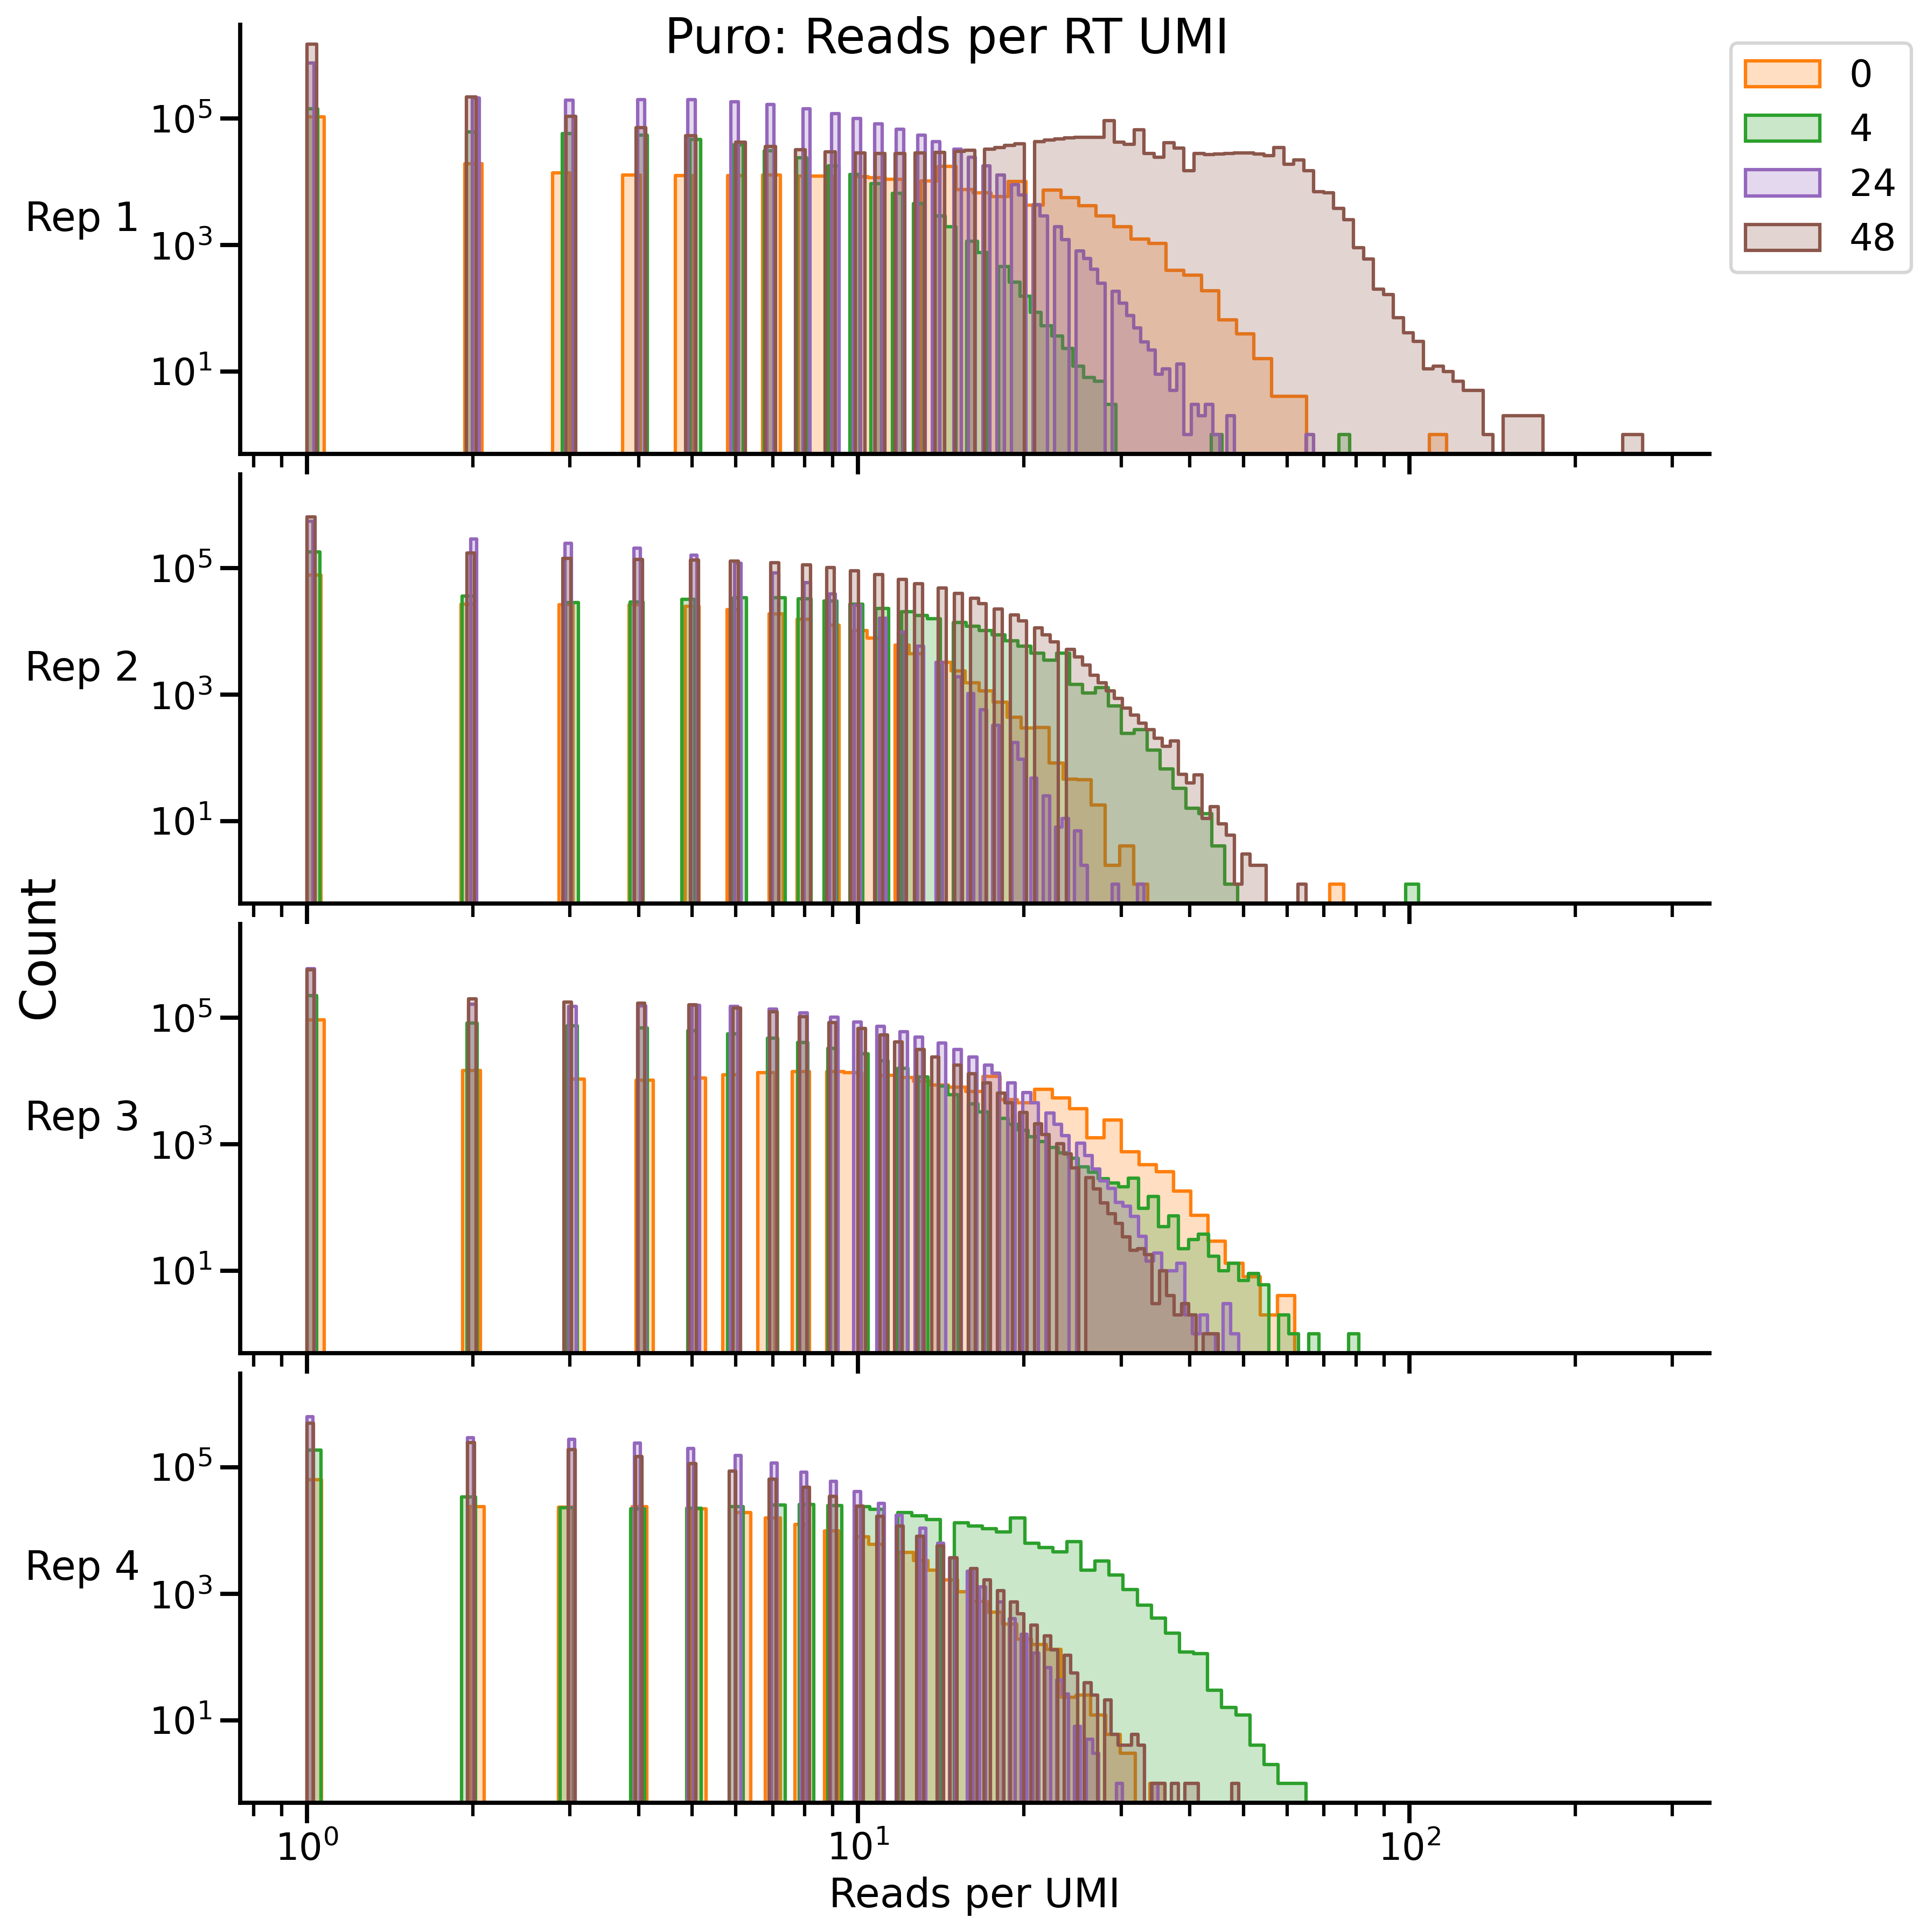

In [40]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), dpi=300, sharex=True, sharey=True)

for ax, rep in tqdm(list(zip(axes, range(1, 5))), total=4):
    df_rep = reads_per_puro_RT_umi_paths_df[reads_per_puro_RT_umi_paths_df["rep"] == rep].sort_values("time")
    df_rep["time"] = df_rep["time"].replace(-1, "0ND")

    for path in df_rep[0]:
        reads_df = RT_puro_reads_cache[path]
        name = re.search(r'/([^/]+)_reads_per_umi\.tsv', path).group(1)
        name = re.search("_T(.*)_S", name).group(1)

        sns.histplot(
            reads_df["reads"],
            log_scale=(True, True),
            element="step",
            alpha=0.25,
            label=name,
            ax=ax,
            color=TIME_PALETTE[name],

        )

    # ax.set_title(f"Rep {rep}")
    ax.set_ylabel(f"Rep {rep}", rotation = 0, x = -100, ha = 'right')
    sns.despine(ax=ax)

axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
axes[-1].set_xlabel("Reads per UMI")

fig.supylabel("Count")
plt.suptitle("Puro: Reads per RT UMI")
plt.tight_layout(pad = 0)
plt.savefig("../../output/NKX2-2/TL4B2/puro_only/no_err_corr/puro_reads_per_rt_umi.png", bbox_inches="tight")

# Reads per sample

In [102]:
reads_per_sample = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/TL4B2_reads_per_sample.csv")
reads_per_sample

,sample,number,Drug,Total Reads
0,T48_R1,13a,Puro_Only,1143881
1,T0_R4,20r,Puro_Only,1909214
2,T0_R2,18r,Puro_Only,2417417
3,T0_R4,20a,Puro_Only,2853220
4,T4_R1,5r,Puro_Only,2976628
...,...,...,...,...
75,RR1_T4,25a,Rimid,21304732
76,T48_R2,14a,Puro_Only,23622168
77,RR2_T4,26a,Rimid,28152975
78,RR1_T0,21a,Rimid,29985472


In [103]:
reads_per_sample["Drug "].value_counts()

Drug 
Rimid        48
Puro_Only    32
Name: count, dtype: int64

In [107]:
reads_per_sample["time"] = reads_per_sample["sample"].str.extract("_?T(\d+)_?").fillna(-1).astype(int)
reads_per_sample["rep"] = reads_per_sample["sample"].str.extract("_?R(\d)_?").astype(int)
reads_per_sample = reads_per_sample.rename(columns = {"Total Reads" : "reads"})
reads_per_sample["seq_type"] = reads_per_sample["number"].str[-1].map({"a" : "AD", "r" : "RT"})
reads_per_sample = reads_per_sample.drop(columns = 'sample')
reads_per_sample = reads_per_sample.drop(columns = 'number')
reads_per_sample

,Drug,reads,time,rep,seq_type
0,Puro_Only,1143881,48,1,AD
1,Puro_Only,1909214,0,4,RT
2,Puro_Only,2417417,0,2,RT
3,Puro_Only,2853220,0,4,AD
4,Puro_Only,2976628,4,1,RT
...,...,...,...,...,...
75,Rimid,21304732,4,1,AD
76,Puro_Only,23622168,48,2,AD
77,Rimid,28152975,4,2,AD
78,Rimid,29985472,0,1,AD


In [108]:
reads_per_rim_AD_umi_paths_df = reads_per_umi_paths_df
reads_per_rim_AD_umi_paths_df["seq_type"] = "AD"
reads_per_rim_AD_umi_paths_df["Drug "] = "Rimid"
reads_per_rim_AD_umi_paths_df

,0,group,rep,time,avg_reads_per_umi,seq_type,Drug
0,/global/scratch/projects/fc_mvslab/OpenProject...,a3_ADBC_Rim_Puro_R3_T0ND_S181,3,-1,12.560860,AD,Rimid
1,/global/scratch/projects/fc_mvslab/OpenProject...,a31_ADBC_Rim_Puro_R3_T6_S185,3,6,1.387636,AD,Rimid
2,/global/scratch/projects/fc_mvslab/OpenProject...,a38_ADBC_Rim_Puro_R2_T48_S192,2,48,1.649361,AD,Rimid
3,/global/scratch/projects/fc_mvslab/OpenProject...,a36_ADBC_Rim_Puro_R4_T24_S190,4,24,4.438312,AD,Rimid
4,/global/scratch/projects/fc_mvslab/OpenProject...,a1_ADBC_Rim_Puro_R1_T0ND_S179,1,-1,15.698134,AD,Rimid
5,/global/scratch/projects/fc_mvslab/OpenProject...,a30_ADBC_Rim_Puro_R2_T6_S184,2,6,3.256452,AD,Rimid
6,/global/scratch/projects/fc_mvslab/OpenProject...,a2_ADBC_Rim_Puro_R2_T0ND_S180,2,-1,14.003191,AD,Rimid
7,/global/scratch/projects/fc_mvslab/OpenProject...,a4_ADBC_Rim_Puro_R4_T0ND_S182,4,-1,14.041801,AD,Rimid
8,/global/scratch/projects/fc_mvslab/OpenProject...,a29_ADBC_Rim_Puro_R1_T6_S183,1,6,2.536164,AD,Rimid
9,/global/scratch/projects/fc_mvslab/OpenProject...,a27_ADBC_Rim_Puro_R3_T4_S169,3,4,2.916011,AD,Rimid


In [109]:
reads_per_rim_RT_umi_paths_df = reads_per_RT_umi_paths_df
reads_per_rim_RT_umi_paths_df["seq_type"] = "RT"
reads_per_rim_RT_umi_paths_df["Drug "] = "Rimid"
reads_per_rim_RT_umi_paths_df

,0,group,rep,time,avg_reads_per_umi,seq_type,Drug
0,/global/scratch/projects/fc_mvslab/OpenProject...,r22_RTBC_Rim_Puro_R2_T0_S172,2,0,6.115505,RT,Rimid
1,/global/scratch/projects/fc_mvslab/OpenProject...,r37_RTBC_Rim_Puro_R1_T48_S199,1,48,5.034880,RT,Rimid
2,/global/scratch/projects/fc_mvslab/OpenProject...,r38_RTBC_Rim_Puro_R2_T48_S200,2,48,5.788049,RT,Rimid
3,/global/scratch/projects/fc_mvslab/OpenProject...,r31_RTBC_Rim_Puro_R3_T6_S209,3,6,3.395508,RT,Rimid
4,/global/scratch/projects/fc_mvslab/OpenProject...,r35_RTBC_Rim_Puro_R3_T24_S197,3,24,3.586948,RT,Rimid
5,/global/scratch/projects/fc_mvslab/OpenProject...,r34_RTBC_Rim_Puro_R2_T24_S196,2,24,5.462036,RT,Rimid
6,/global/scratch/projects/fc_mvslab/OpenProject...,r21_RTBC_Rim_Puro_R1_T0_S171,1,0,5.463885,RT,Rimid
7,/global/scratch/projects/fc_mvslab/OpenProject...,r1_RTBC_Rim_Puro_R1_T0ND_S203,1,-1,10.807375,RT,Rimid
8,/global/scratch/projects/fc_mvslab/OpenProject...,r33_RTBC_Rim_Puro_R1_T24_S195,1,24,4.066981,RT,Rimid
9,/global/scratch/projects/fc_mvslab/OpenProject...,r30_RTBC_Rim_Puro_R2_T6_S208,2,6,4.113260,RT,Rimid


In [110]:
reads_per_puro_AD_umi_paths_df["seq_type"] = "AD"
reads_per_puro_AD_umi_paths_df["Drug "] = "Puro_Only"
reads_per_puro_AD_umi_paths_df

,0,group,rep,time,avg_reads_per_umi,seq_type,Drug
0,/global/scratch/projects/fc_mvslab/OpenProject...,a5_ADBC_Puro_Only_R1_T4_S94,1,4,4.441653,AD,Puro_Only
1,/global/scratch/projects/fc_mvslab/OpenProject...,a9_ADBC_Puro_Only_R1_T24_S98,1,24,4.513740,AD,Puro_Only
2,/global/scratch/projects/fc_mvslab/OpenProject...,a17_ADBC_Puro_Only_R1_T0_S89,1,0,6.225439,AD,Puro_Only
3,/global/scratch/projects/fc_mvslab/OpenProject...,a6_ADBC_Puro_Only_R2_T4_S95,2,4,6.040711,AD,Puro_Only
4,/global/scratch/projects/fc_mvslab/OpenProject...,a10_ADBC_Puro_Only_R2_T24_S99,2,24,2.649993,AD,Puro_Only
5,/global/scratch/projects/fc_mvslab/OpenProject...,a13_ADBC_Puro_Only_R1_T48_S86,1,48,1.039001,AD,Puro_Only
6,/global/scratch/projects/fc_mvslab/OpenProject...,a8_ADBC_Puro_Only_R4_T4_S97,4,4,2.809152,AD,Puro_Only
7,/global/scratch/projects/fc_mvslab/OpenProject...,a18_ADBC_Puro_Only_R2_T0_S90,2,0,6.235921,AD,Puro_Only
8,/global/scratch/projects/fc_mvslab/OpenProject...,a14_ADBC_Puro_Only_R2_T48_S87,2,48,4.525868,AD,Puro_Only
9,/global/scratch/projects/fc_mvslab/OpenProject...,a16_ADBC_Puro_Only_R4_T48_S88,4,48,3.914532,AD,Puro_Only


In [111]:
reads_per_puro_RT_umi_paths_df["seq_type"] = "RT"
reads_per_puro_RT_umi_paths_df["Drug "] = "Puro_Only"
reads_per_puro_RT_umi_paths_df

,0,group,rep,time,avg_reads_per_umi,seq_type,Drug
0,/global/scratch/projects/fc_mvslab/OpenProject...,r17_RTBC_Puro_Only_R1_T0_S114,1,0,8.152458,RT,Puro_Only
1,/global/scratch/projects/fc_mvslab/OpenProject...,r19_RTBC_Puro_Only_R3_T0_S116,3,0,8.070906,RT,Puro_Only
2,/global/scratch/projects/fc_mvslab/OpenProject...,r12_RTBC_Puro_Only_R4_T24_S109,4,24,3.811458,RT,Puro_Only
3,/global/scratch/projects/fc_mvslab/OpenProject...,r18_RTBC_Puro_Only_R2_T0_S115,2,0,4.913839,RT,Puro_Only
4,/global/scratch/projects/fc_mvslab/OpenProject...,r9_RTBC_Puro_Only_R1_T24_S106,1,24,5.331626,RT,Puro_Only
5,/global/scratch/projects/fc_mvslab/OpenProject...,r7_RTBC_Puro_Only_R3_T4_S104,3,4,4.946900,RT,Puro_Only
6,/global/scratch/projects/fc_mvslab/OpenProject...,r15_RTBC_Puro_Only_R3_T48_S112,3,48,4.888904,RT,Puro_Only
7,/global/scratch/projects/fc_mvslab/OpenProject...,r10_RTBC_Puro_Only_R2_T24_S107,2,24,3.493062,RT,Puro_Only
8,/global/scratch/projects/fc_mvslab/OpenProject...,r11_RTBC_Puro_Only_R3_T24_S108,3,24,5.618315,RT,Puro_Only
9,/global/scratch/projects/fc_mvslab/OpenProject...,r13_RTBC_Puro_Only_R1_T48_S110,1,48,13.654398,RT,Puro_Only


In [140]:
all_files = pd.concat([reads_per_rim_AD_umi_paths_df, reads_per_rim_RT_umi_paths_df, reads_per_puro_AD_umi_paths_df, reads_per_puro_RT_umi_paths_df])
all_files

,0,group,rep,time,avg_reads_per_umi,seq_type,Drug
0,/global/scratch/projects/fc_mvslab/OpenProject...,a3_ADBC_Rim_Puro_R3_T0ND_S181,3,-1,12.560860,AD,Rimid
1,/global/scratch/projects/fc_mvslab/OpenProject...,a31_ADBC_Rim_Puro_R3_T6_S185,3,6,1.387636,AD,Rimid
2,/global/scratch/projects/fc_mvslab/OpenProject...,a38_ADBC_Rim_Puro_R2_T48_S192,2,48,1.649361,AD,Rimid
3,/global/scratch/projects/fc_mvslab/OpenProject...,a36_ADBC_Rim_Puro_R4_T24_S190,4,24,4.438312,AD,Rimid
4,/global/scratch/projects/fc_mvslab/OpenProject...,a1_ADBC_Rim_Puro_R1_T0ND_S179,1,-1,15.698134,AD,Rimid
...,...,...,...,...,...,...,...
11,/global/scratch/projects/fc_mvslab/OpenProject...,r6_RTBC_Puro_Only_R2_T4_S103,2,4,6.837315,RT,Puro_Only
12,/global/scratch/projects/fc_mvslab/OpenProject...,r16_RTBC_Puro_Only_R4_T48_S113,4,48,3.532356,RT,Puro_Only
13,/global/scratch/projects/fc_mvslab/OpenProject...,r14_RTBC_Puro_Only_R2_T48_S111,2,48,6.157269,RT,Puro_Only
14,/global/scratch/projects/fc_mvslab/OpenProject...,r8_RTBC_Puro_Only_R4_T4_S105,4,4,7.374706,RT,Puro_Only


In [141]:
all_files = pd.merge(all_files, reads_per_sample)
all_files

,0,group,rep,time,avg_reads_per_umi,seq_type,Drug,reads
0,/global/scratch/projects/fc_mvslab/OpenProject...,a3_ADBC_Rim_Puro_R3_T0ND_S181,3,-1,12.560860,AD,Rimid,4530021
1,/global/scratch/projects/fc_mvslab/OpenProject...,a31_ADBC_Rim_Puro_R3_T6_S185,3,6,1.387636,AD,Rimid,3482656
2,/global/scratch/projects/fc_mvslab/OpenProject...,a38_ADBC_Rim_Puro_R2_T48_S192,2,48,1.649361,AD,Rimid,7075741
3,/global/scratch/projects/fc_mvslab/OpenProject...,a36_ADBC_Rim_Puro_R4_T24_S190,4,24,4.438312,AD,Rimid,15270314
4,/global/scratch/projects/fc_mvslab/OpenProject...,a1_ADBC_Rim_Puro_R1_T0ND_S179,1,-1,15.698134,AD,Rimid,4823573
...,...,...,...,...,...,...,...,...
75,/global/scratch/projects/fc_mvslab/OpenProject...,r6_RTBC_Puro_Only_R2_T4_S103,2,4,6.837315,RT,Puro_Only,6028508
76,/global/scratch/projects/fc_mvslab/OpenProject...,r16_RTBC_Puro_Only_R4_T48_S113,4,48,3.532356,RT,Puro_Only,6319785
77,/global/scratch/projects/fc_mvslab/OpenProject...,r14_RTBC_Puro_Only_R2_T48_S111,2,48,6.157269,RT,Puro_Only,16049369
78,/global/scratch/projects/fc_mvslab/OpenProject...,r8_RTBC_Puro_Only_R4_T4_S105,4,4,7.374706,RT,Puro_Only,5937155


In [142]:
all_files = all_files.sort_values(by = 'time')
all_files

,0,group,rep,time,avg_reads_per_umi,seq_type,Drug,reads
0,/global/scratch/projects/fc_mvslab/OpenProject...,a3_ADBC_Rim_Puro_R3_T0ND_S181,3,-1,12.560860,AD,Rimid,4530021
44,/global/scratch/projects/fc_mvslab/OpenProject...,r4_RTBC_Rim_Puro_R4_T0ND_S206,4,-1,10.595249,RT,Rimid,11837875
40,/global/scratch/projects/fc_mvslab/OpenProject...,r3_RTBC_Rim_Puro_R3_T0ND_S205,3,-1,8.147653,RT,Rimid,9620532
31,/global/scratch/projects/fc_mvslab/OpenProject...,r1_RTBC_Rim_Puro_R1_T0ND_S203,1,-1,10.807375,RT,Rimid,10701708
7,/global/scratch/projects/fc_mvslab/OpenProject...,a4_ADBC_Rim_Puro_R4_T0ND_S182,4,-1,14.041801,AD,Rimid,5220815
...,...,...,...,...,...,...,...,...
14,/global/scratch/projects/fc_mvslab/OpenProject...,a37_ADBC_Rim_Puro_R1_T48_S191,1,48,4.219066,AD,Rimid,13070839
53,/global/scratch/projects/fc_mvslab/OpenProject...,a13_ADBC_Puro_Only_R1_T48_S86,1,48,1.039001,AD,Puro_Only,1143881
47,/global/scratch/projects/fc_mvslab/OpenProject...,r39_RTBC_Rim_Puro_R3_T48_S201,3,48,5.114158,RT,Rimid,15699753
2,/global/scratch/projects/fc_mvslab/OpenProject...,a38_ADBC_Rim_Puro_R2_T48_S192,2,48,1.649361,AD,Rimid,7075741


In [143]:
all_files['time'] = all_files['time'].replace(-1, "0ND") 
all_files['time'] =all_files['time'].astype(str)
all_files

,0,group,rep,time,avg_reads_per_umi,seq_type,Drug,reads
0,/global/scratch/projects/fc_mvslab/OpenProject...,a3_ADBC_Rim_Puro_R3_T0ND_S181,3,0ND,12.560860,AD,Rimid,4530021
44,/global/scratch/projects/fc_mvslab/OpenProject...,r4_RTBC_Rim_Puro_R4_T0ND_S206,4,0ND,10.595249,RT,Rimid,11837875
40,/global/scratch/projects/fc_mvslab/OpenProject...,r3_RTBC_Rim_Puro_R3_T0ND_S205,3,0ND,8.147653,RT,Rimid,9620532
31,/global/scratch/projects/fc_mvslab/OpenProject...,r1_RTBC_Rim_Puro_R1_T0ND_S203,1,0ND,10.807375,RT,Rimid,10701708
7,/global/scratch/projects/fc_mvslab/OpenProject...,a4_ADBC_Rim_Puro_R4_T0ND_S182,4,0ND,14.041801,AD,Rimid,5220815
...,...,...,...,...,...,...,...,...
14,/global/scratch/projects/fc_mvslab/OpenProject...,a37_ADBC_Rim_Puro_R1_T48_S191,1,48,4.219066,AD,Rimid,13070839
53,/global/scratch/projects/fc_mvslab/OpenProject...,a13_ADBC_Puro_Only_R1_T48_S86,1,48,1.039001,AD,Puro_Only,1143881
47,/global/scratch/projects/fc_mvslab/OpenProject...,r39_RTBC_Rim_Puro_R3_T48_S201,3,48,5.114158,RT,Rimid,15699753
2,/global/scratch/projects/fc_mvslab/OpenProject...,a38_ADBC_Rim_Puro_R2_T48_S192,2,48,1.649361,AD,Rimid,7075741


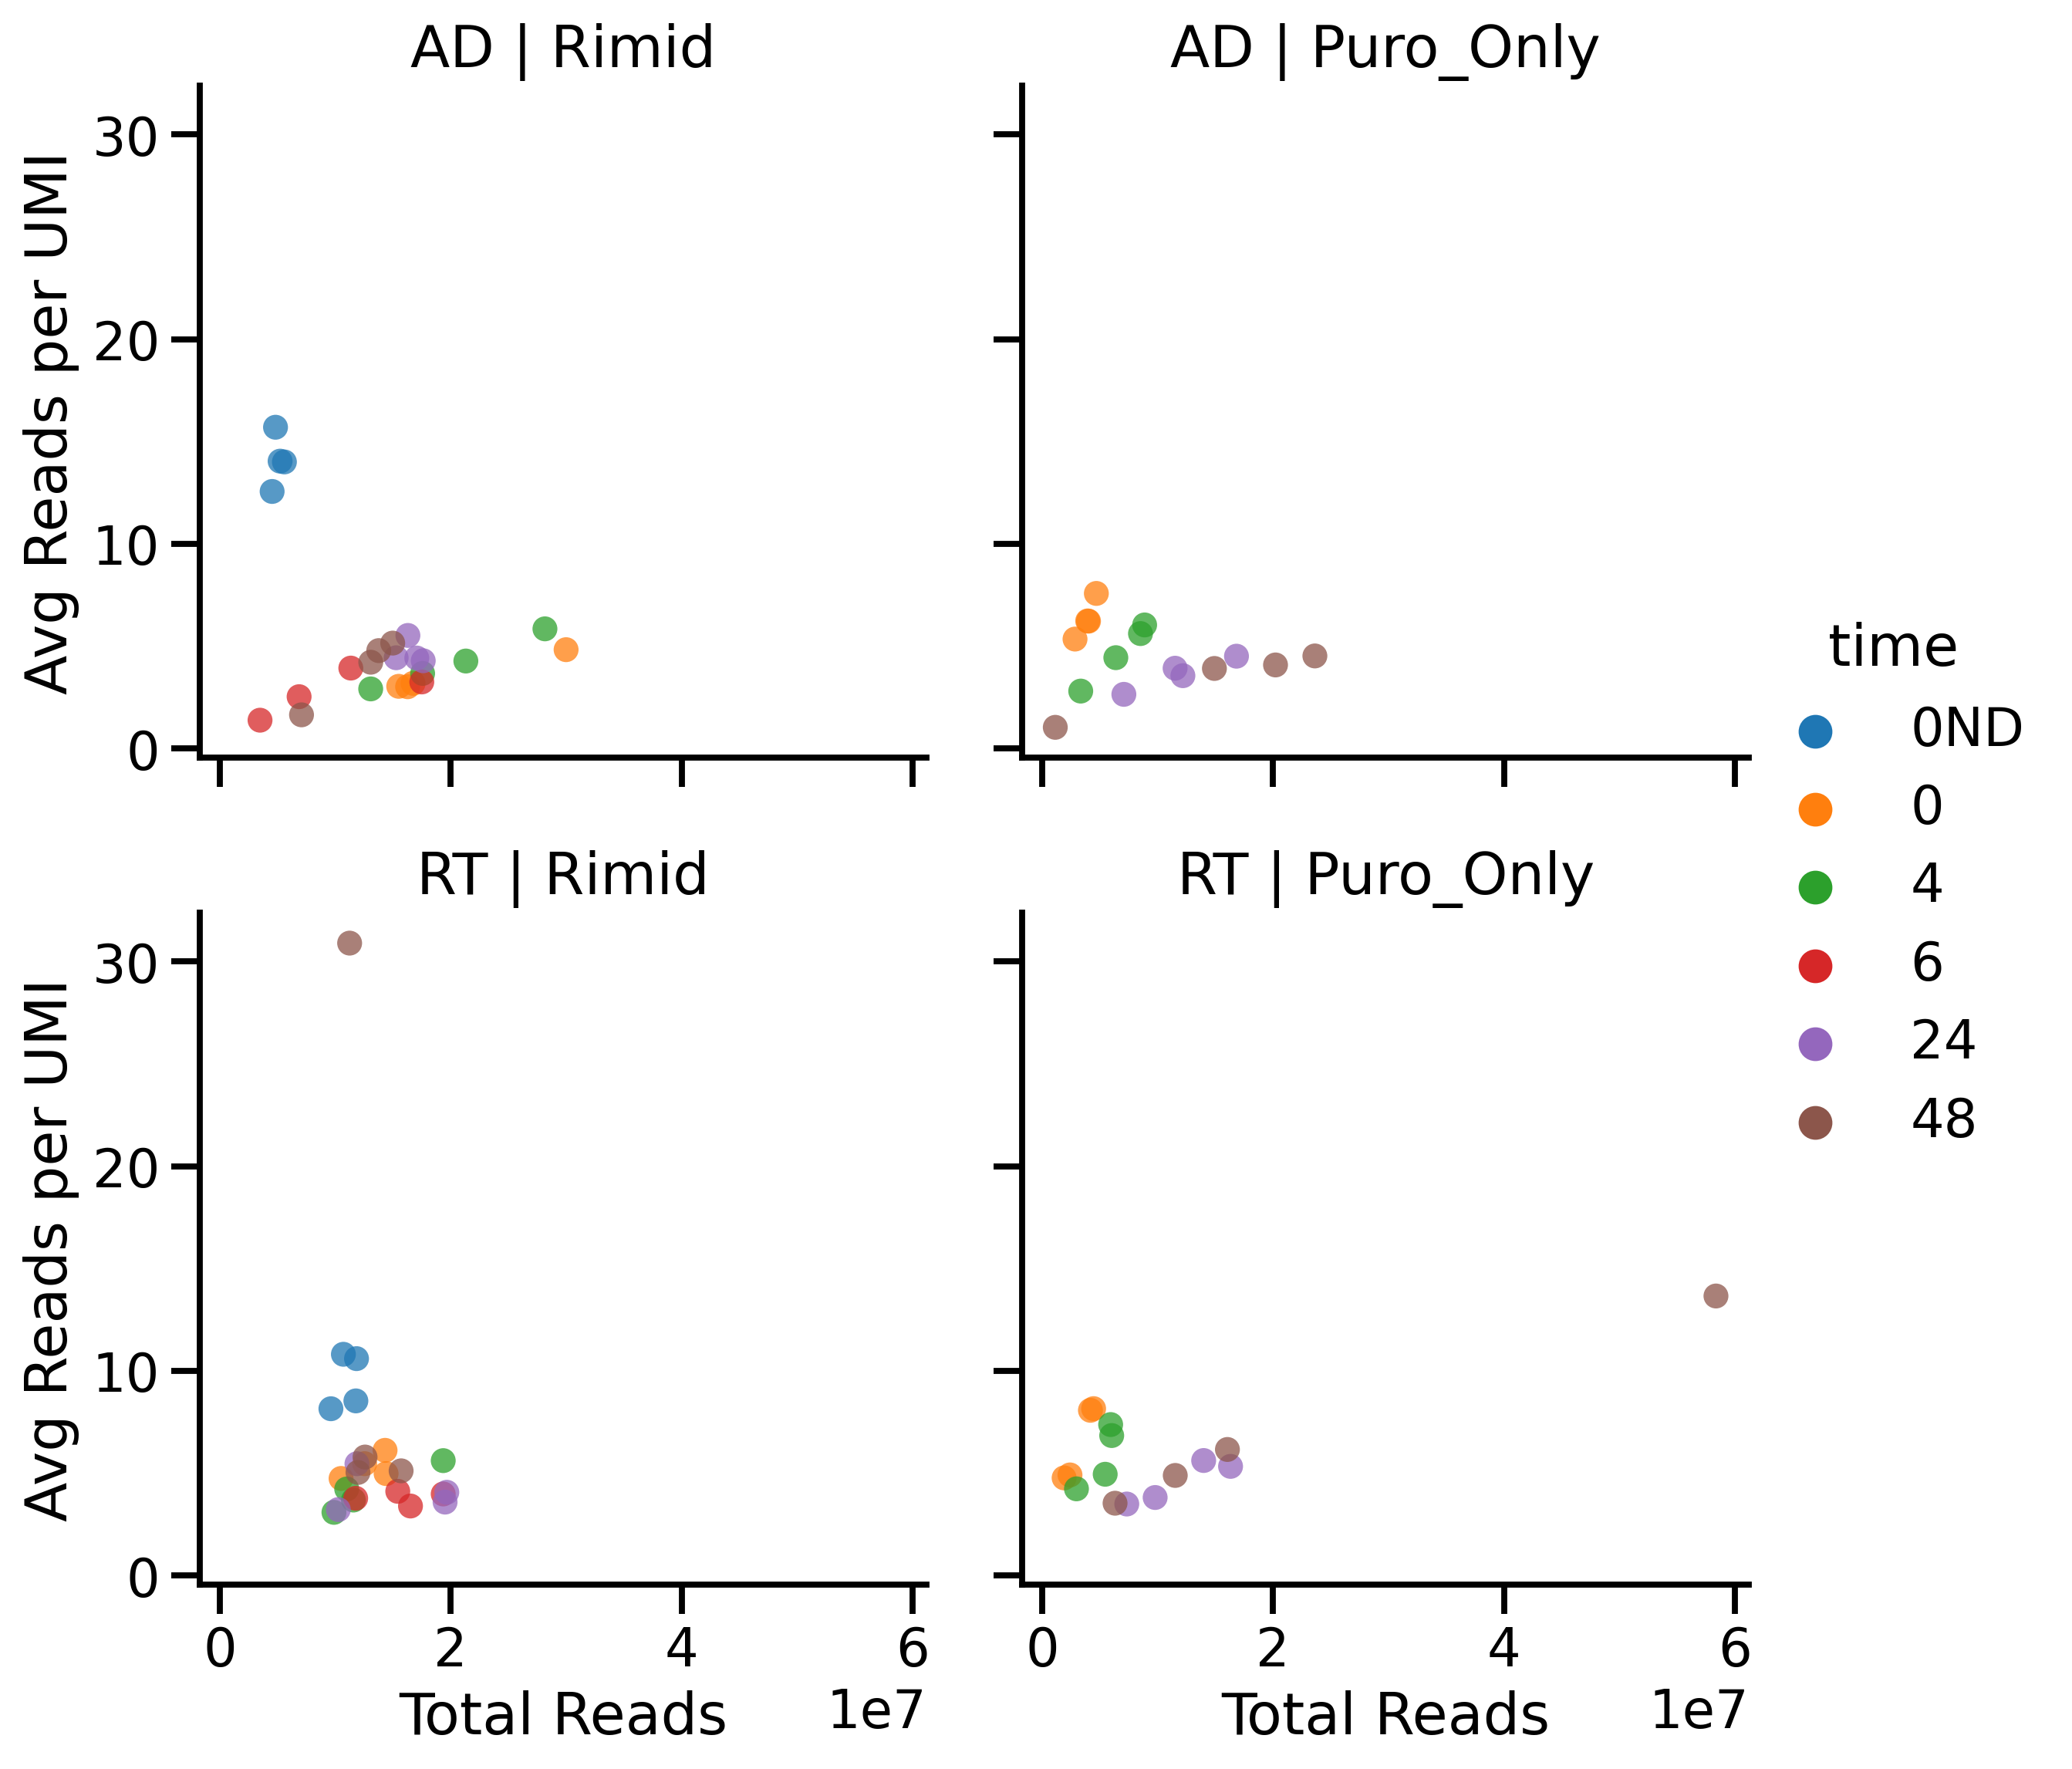

In [179]:
plot_df = all_files.copy()

# Keep raw values (not log) as you did
plot_df["log_reads"] = plot_df["reads"]
plot_df["log_avg_reads_per_umi"] = plot_df["avg_reads_per_umi"]

# Create FacetGrid
g = sns.FacetGrid(
    plot_df,
    row="seq_type",
    col="Drug ",
    height=4,
    aspect=1
)

# Scatter plot
g.map_dataframe(
    sns.scatterplot,
    x="log_reads",
    y="log_avg_reads_per_umi",
    hue="time",
    palette=TIME_PALETTE,
    s=60,
    edgecolor='none',
    alpha=0.75
)

# Titles, axis labels
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_axis_labels("Total Reads", "Avg Reads per UMI")

# Legend and style
g.add_legend(title="time")
sns.despine()

# Set DPI for the figure
g.fig.set_dpi(300)
